### 입력 데이터셋 _ 코사인과 주가

In [1]:
import numpy as np
import pandas as pd 

In [2]:
def fetch_cosine_values(seq_len, frequency = 0.01, noise = 0.1) :
    np.random.seed(101)
    x = np.arange(0.0, seq_len, 1.0)
    
    return np.cos( 2 * np.pi * frequency * x ) + np.random.uniform(low=-noise, high=noise, size=seq_len)

In [3]:
print( fetch_cosine_values(10, frequency=0.1))

[ 1.00327973  0.82315051  0.21471184 -0.37471266 -0.7719616  -0.93322063
 -0.84762375 -0.23029438  0.35332577  0.74700479]


In [4]:
J = np.arange(0.0, 10, 1.0)
np.cos(2 * np.pi * 0.01 * J), np.random.uniform(low=-0.1, high=0.1, size=10)

(array([1.        , 0.99802673, 0.9921147 , 0.98228725, 0.96858316,
        0.95105652, 0.92977649, 0.90482705, 0.87630668, 0.84432793]),
 array([ 0.01084552, -0.02957361, -0.06362152,  0.05712035,  0.09309664,
        -0.05352927, -0.08328771,  0.02070968,  0.04579855, -0.04475223]))

In [5]:
np.cos(2 * np.pi * 0.01 * J) + np.random.uniform(low=-0.1, high=0.1, size=10)

array([1.03706127, 1.00160022, 0.90181161, 0.9098611 , 0.90597665,
       1.0499201 , 0.93390957, 0.92058496, 0.92327049, 0.85272028])

In [6]:
#! curl "https://www.quandl.com/api/v3/datasets/WIKI/FB/data.csv"

In [7]:
k1 = '1, 2, 3, 4, 5, 6'
k2 = '0,10,20,33,34,51'

ic = {}
for row, col in zip(k1.split(','), k2.split(',')) : 
    ic[row] = col
print(ic)


{'1': '0', ' 2': '10', ' 3': '20', ' 4': '33', ' 5': '34', ' 6': '51'}


In [8]:
# dic 
s1 = "Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume"
s2 = "2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0"

dic = {}
for i, j in zip(s1.split(','), s2.split(',')) :
    dic[i] = j
print(dic)

{'Date': '2018-03-27', 'Open': '156.31', 'High': '162.85', 'Low': '150.75', 'Close': '152.19', 'Volume': '76787884.0', 'Ex-Dividend': '0.0', 'Split Ratio': '1.0', 'Adj. Open': '156.31', 'Adj. High': '162.85', 'Adj. Low': '150.75', 'Adj. Close': '152.19', 'Adj. Volume': '76787884.0'}


In [9]:
import os
import pickle
import quandl
import datetime

In [ ]:
# def date_obj_to_str(date_obj):
#     # yyyy-mm-dd
#     return date_obj.strftime('%y-%m-%d')

# def save_pickle(something, path): 
#     if not os.path.exists(os.path.dirname(path)):
#         os.makedirs(os.path.dirname(path))
#         with open(path, 'wb') as fh:
#             # 
#             pickle.dump(something, fh , pickle.DEFAULT_PROTOCOL)
            
# def load_pickle(path):
#     with open(path, 'rb') as fh :
#         return pickle.load(fh)
    
# # api 개인 (quandl = "kF3tPMFDQoSdoL6MUs8s" )
# quandl.ApiConfig.api_key =  "kF3tPMFDQoSdoL6MUs8s"

In [10]:
def date_obj_to_str(date_obj):
    # yyyy-mm-dd
    return date_obj.strftime('%y-%m-%d')

In [11]:
def save_pickle(something, path): 
    if not os.path.exists(os.path.dirname(path)):
        os.makedirs(os.path.dirname(path))
        with open(path, 'wb') as fh:
            # 
            pickle.dump(something, fh , pickle.DEFAULT_PROTOCOL)

In [12]:
def load_pickle(path):
    with open(path, 'rb') as fh :
        return pickle.load(fh)

In [13]:
# api 개인 (quandl = "kF3tPMFDQoSdoL6MUs8s" )
quandl.ApiConfig.api_key =  "kF3tPMFDQoSdoL6MUs8s"

In [14]:
def fetch_stock_price(symbol, from_date, to_date, cache_path = './tmp/prices/'):
    
    assert(from_date <= to_date)
    filename = "{}_{}_{}.pk".format(symbol, str(from_date), str(to_date))
    price_filepath = os.path.join(cache_path, filename)
    
    try : 
        price = load_pickle(price_filepath)
        print("--")
        print("loaded from", price_filepath)
    except IOError :
        historic = quandl.get("WIKI/" + symbol,
                              start_date = date_obj_to_str(from_date),
                              end_date   = date_obj_to_str(to_date))
        
        prices = historic["Adj. Close"].tolist()
        save_pickle(prices , price_filepath)
        print("saved into", price_filepath)
    return prices

### 데이터 셋 포멧 구성 

In [15]:
c_v = fetch_cosine_values(20, frequency = 0.1)
val = c_v
t_f = 5
f_sp = [] 
for i in range(len(val) - t_f ):
    f_sp.append(val[i + t_f])
print (f_sp)

[-0.9332206274727847, -0.8476237504404999, -0.23029437843826808, 0.35332576672860816, 0.7470047852159067, 1.0108455182249574, 0.7794433851802703, 0.24539547490696345, -0.25189664200207534, -0.7159203498925534, -1.0535292676370478, -0.892304707642279, -0.28830730991670417, 0.35481554583247055, 0.7642647600743997]


In [16]:
fts = np.vstack(f_sp)
labl = np.array(val[t_f :])

fts , labl

(array([[-0.93322063],
        [-0.84762375],
        [-0.23029438],
        [ 0.35332577],
        [ 0.74700479],
        [ 1.01084552],
        [ 0.77944339],
        [ 0.24539547],
        [-0.25189664],
        [-0.71592035],
        [-1.05352927],
        [-0.89230471],
        [-0.28830731],
        [ 0.35481555],
        [ 0.76426476]]),
 array([-0.93322063, -0.84762375, -0.23029438,  0.35332577,  0.74700479,
         1.01084552,  0.77944339,  0.24539547, -0.25189664, -0.71592035,
        -1.05352927, -0.89230471, -0.28830731,  0.35481555,  0.76426476]))

In [17]:
def format_dataset(values, temporal_features) : 

    feat_splits = [] 
    for i in range(len(values) - temporal_features):
        feat_splits.append(values[i:i+temporal_features])
         
    feats  = np.vstack(feat_splits)
    labels = np.array(values[temporal_features:])
    
    return feats, labels

In [18]:
vals = fetch_cosine_values(100, frequency = 0.1)
format_dataset(vals,5)

(array([[ 1.00327973,  0.82315051,  0.21471184, -0.37471266, -0.7719616 ],
        [ 0.82315051,  0.21471184, -0.37471266, -0.7719616 , -0.93322063],
        [ 0.21471184, -0.37471266, -0.7719616 , -0.93322063, -0.84762375],
        [-0.37471266, -0.7719616 , -0.93322063, -0.84762375, -0.23029438],
        [-0.7719616 , -0.93322063, -0.84762375, -0.23029438,  0.35332577],
        [-0.93322063, -0.84762375, -0.23029438,  0.35332577,  0.74700479],
        [-0.84762375, -0.23029438,  0.35332577,  0.74700479,  1.01084552],
        [-0.23029438,  0.35332577,  0.74700479,  1.01084552,  0.77944339],
        [ 0.35332577,  0.74700479,  1.01084552,  0.77944339,  0.24539547],
        [ 0.74700479,  1.01084552,  0.77944339,  0.24539547, -0.25189664],
        [ 1.01084552,  0.77944339,  0.24539547, -0.25189664, -0.71592035],
        [ 0.77944339,  0.24539547, -0.25189664, -0.71592035, -1.05352927],
        [ 0.24539547, -0.25189664, -0.71592035, -1.05352927, -0.89230471],
        [-0.25189664, -0.

In [19]:
# # fetch_cosine_values, fetch_stock_price, format_dataset

# def fetch_cosine_values(seq_len, frequency = 0.01, noise = 0.1) :
#     np.random.seed(101)
#     # random_ seed : fetch_cosine_values가 가진 범위 안에서 난수 수열을 랜덤으로 생성..101 
#     x = np.arange(0.0, seq_len, 1.0)
    
#     return np.cos( 2 * np.pi * frequency * x ) + np.random.uniform(low=-noise, high=noise, size=seq_len)

# def fetch_stock_price(symbol, from_date, to_date, cache_path = './tmp/prices/'):
#     # 
#     assert(from_date <= to_date)
#     filename = "{}_{}_{}.pk".format(symbol, str(from_date), str(to_date))
#     # deep_check
#     price_filepath = os.path.join(cache_path, filename)
    
#     # 예외처리 
#     try : 
#         price = load_pickle(price_filepath)
#         print("--")
#         print("loaded from", price_filepath)
#     except IOError :
#         #  pk된 파일이 없으면 aip 통해서 재 생성 ?? _check
#         historic = quandl.get("WIKI/" + symbol,
#                               start_date = date_obj_to_str(from_date),
#                               end_date   = date_obj_to_str(to_date))
        
#         prices = historic["Adj. Close"].tolist()
#         save_pickle(prices , price_filepath)
#         print("saved into", price_filepath)
#     return prices

# def format_dataset(values, temporal_features) : 
#     # 
#     feat_splits = [] 
#     for i in range(len(values) - temporal_features):
#         feat_splits.append(values[i + temporal_features])
        
#     # 모든 관측값 => 레이블과 함께 세로로 연결
#     # https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html
#     #vstack : 배열을 수직으로 
#     feats  = np.vstack(feat_splits)
#     labels = np.array(values[temporal_features :])
    
#     # 정해진 개수의 열을 갖는 관측값과 레이블 벡터
#     return feats, labels

In [20]:
import datetime
import matplotlib.pyplot as plt
import numpy as np 
import seaborn

np.set_printoptions(precision=2)

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


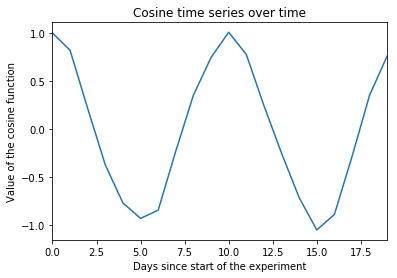

In [21]:
cos_values = fetch_cosine_values(20 , frequency= 0.1)
seaborn.tsplot(cos_values)
plt.xlabel("Days since start of the experiment")
plt.ylabel("Value of the cosine function")
plt.title("Cosine time series over time")
plt.show()

In [22]:
print(cos_values)

[ 1.    0.82  0.21 -0.37 -0.77 -0.93 -0.85 -0.23  0.35  0.75  1.01  0.78
  0.25 -0.25 -0.72 -1.05 -0.89 -0.29  0.35  0.76]


In [23]:
print(cos_values.shape)

(20,)


In [24]:
features_size = 5

minibatch_cos_X , minibatch_cos_y  = format_dataset(cos_values , features_size)
print('minibatch_cos_X.shape : ', minibatch_cos_X.shape)
print('minibatch_cos_y.shape : ', minibatch_cos_y.shape)

minibatch_cos_X.shape :  (15, 5)
minibatch_cos_y.shape :  (15,)


In [25]:
minibatch_cos_X

array([[ 1.  ,  0.82,  0.21, -0.37, -0.77],
       [ 0.82,  0.21, -0.37, -0.77, -0.93],
       [ 0.21, -0.37, -0.77, -0.93, -0.85],
       [-0.37, -0.77, -0.93, -0.85, -0.23],
       [-0.77, -0.93, -0.85, -0.23,  0.35],
       [-0.93, -0.85, -0.23,  0.35,  0.75],
       [-0.85, -0.23,  0.35,  0.75,  1.01],
       [-0.23,  0.35,  0.75,  1.01,  0.78],
       [ 0.35,  0.75,  1.01,  0.78,  0.25],
       [ 0.75,  1.01,  0.78,  0.25, -0.25],
       [ 1.01,  0.78,  0.25, -0.25, -0.72],
       [ 0.78,  0.25, -0.25, -0.72, -1.05],
       [ 0.25, -0.25, -0.72, -1.05, -0.89],
       [-0.25, -0.72, -1.05, -0.89, -0.29],
       [-0.72, -1.05, -0.89, -0.29,  0.35]])

In [26]:
minibatch_cos_y

array([-0.93, -0.85, -0.23,  0.35,  0.75,  1.01,  0.78,  0.25, -0.25,
       -0.72, -1.05, -0.89, -0.29,  0.35,  0.76])

In [27]:
for i in range(5) : 
    feats = minibatch_cos_X[i, :]
    label = minibatch_cos_y[i]
    print("Observation {} : X={} y={}".format(i, feats, label))

Observation 0 : X=[ 1.    0.82  0.21 -0.37 -0.77] y=-0.9332206274727847
Observation 1 : X=[ 0.82  0.21 -0.37 -0.77 -0.93] y=-0.8476237504404999
Observation 2 : X=[ 0.21 -0.37 -0.77 -0.93 -0.85] y=-0.23029437843826808
Observation 3 : X=[-0.37 -0.77 -0.93 -0.85 -0.23] y=0.35332576672860816
Observation 4 : X=[-0.77 -0.93 -0.85 -0.23  0.35] y=0.7470047852159067


In [28]:
range(i, features_size+i)

range(4, 9)

Observation 0 : X=[ 1.    0.82  0.21 -0.37 -0.77] y=-0.9332206274727847
Observation 1 : X=[ 0.82  0.21 -0.37 -0.77 -0.93] y=-0.8476237504404999
Observation 2 : X=[ 0.21 -0.37 -0.77 -0.93 -0.85] y=-0.23029437843826808
Observation 3 : X=[-0.37 -0.77 -0.93 -0.85 -0.23] y=0.35332576672860816
Observation 4 : X=[-0.77 -0.93 -0.85 -0.23  0.35] y=0.7470047852159067


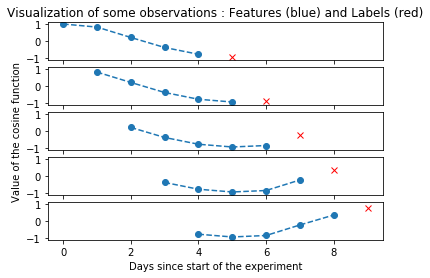

In [29]:
samples_to_plot = 5

f, axarr = plt.subplots(samples_to_plot, sharex = True)
for i in range(samples_to_plot) : 
    feats = minibatch_cos_X[i, :]
    label = minibatch_cos_y[i]
    print("Observation {} : X={} y={}".format(i, feats, label))
    
    axarr[i].plot(range(i, features_size+i), feats, '--o')
    axarr[i].plot([features_size+i], label, 'rx')
    axarr[i].set_ylim([-1.1, 1.1])
    
plt.xlabel("Days since start of the experiment")
axarr[2].set_ylabel("Value of the cosine function")
axarr[0].set_title("Visualization of some observations : Features (blue) and Labels (red)")
plt.show()

saved into ./tmp/prices/MSFT_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/KO_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/AAL_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/MMM_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/AXP_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/GE_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/GM_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/JPM_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/UPS_2015-01-01_2016-12-31.pk


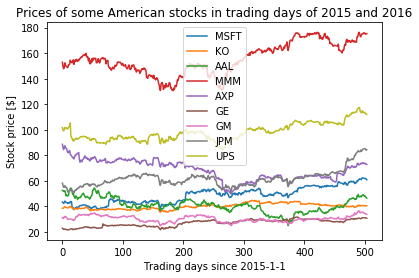

In [30]:
symbols = ["MSFT", "KO", "AAL", "MMM", "AXP", "GE", "GM", "JPM", "UPS"]
ax = plt.subplot(1, 1, 1) 
for sym in symbols :
    prices = fetch_stock_price(sym, datetime.date(2015, 1, 1), datetime.date(2016, 12, 31))
    ax.plot(range(len(prices)), prices, label = sym) 

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels)
plt.xlabel("Trading days since 2015-1-1")
plt.ylabel("Stock price [$]")
plt.title("Prices of some American stocks in trading days of 2015 and 2016")
plt.show()

### 회귀 모델을 이용한 미래 주가 예측

#### 회귀분석 ( regression analysis )
관찰된 연속형 변수들에 대해 두 변수 사이의 모형을 구한뒤 **적합도를 측정** 해 내는 분석 방법이다.

*회귀분석은 시간에 따라 변화하는 데이터나 어떤 영향, 가설적 실험, 인과 관계의 모델링등의 통계적 예측에 이용될 수 있다. 그러나 많은 경우 가정이 맞는지 아닌지 적절하게 밝혀지지 않은 채로 이용되어 그 결과가 오용되는 경우도 있다. *

관측 행렬과 실제 값 레이블이 주어지면 
처음에는 이 문제를 회귀 문제로 풀고 싶기 마련이다.
이 경우 회귀는 매우 간단
수치 벡터에서 수치 값을 예측하는 것
=> 이상적인 방법이 아니다

문제를 회귀 문제로 다루게 되면
알고리즘은 각 특징이 독립적이라고 간주해야 한다
그러나 이 예제에서 각 특징은
동일한 시계열의 슬라이딩 윈도우이므로 서로 상관되어 있다

우선 '각 특징이 독립적'이라는 단순한 가정에서 시작


평가 함수 -> 모델을 평가하기 위해서 주어짐 : 관측 행렬, 실제 레이블, 예측 레이블 
평균 제곱 오차 & 평균 절대 오차를 출력하는 함수 생성 
=> 성능은 시각적으로 확인 할 수 있게 
훈련, 테스트, 예측 시계열을 겹쳐서*** 그래프 그림 

In [31]:
def matrix_to_array(m) :
    return np.asarray(m).reshape(-1)

In [32]:
import numpy as np
from matplotlib import pylab as plt
#from tools import matrix_to_array

def evaluate_ts(features, y_true, y_pred):
    print("Evaluation of the predictions :")
    # 평균 제곱 오차 (Mean Squared Error)
    print("MSE(평균 제곱 오차) : ", np.mean(np.square(y_true - y_pred)))
    # 평균 절대 오차 (Mean Absolute Error)
    print("MAE(평균 절대 오차) : ", np.mean(np.abs(y_true - y_pred)))
    
    print("Benchmark : if prediction == last feature")
    print("MSE : ", np.mean(np.square(features[:,-1]- y_true)))
    print("mae : ", np.mean(np.abs(features[:,-1]- y_true)))
    
    plt.plot(matrix_to_array(y_true), 'b')
    plt.plot(matrix_to_array(y_pred), 'r--')
    plt.xlabel("Days")
    plt.ylabel("Predicted and true values")
    plt.title("Predicted (Red) VS Real (Blue)")
    plt.show()
    
    error = np.abs(matrix_to_array(y_pred)- matrix_to_array(y_true))
    plt.plot(error,'r')
    fit   = np.polyfit(range(len(error)), error, deg = 1)
    plt.plot(fit[0] * range(len(error)) + fit[1], '--')
    plt.xlabel("Days")
    plt.ylabel("Prediction error L1 norm")
    plt.title("Prediction error (absolute) and trendline")
    plt.show()

In [33]:
def regression_ANN(x, weights, biases ):
    return tf.add(biases, tf.matmul(x, weights))

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf 
from tensorflow.contrib import rnn

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\JerryKim\AppData

In [35]:
tf.reset_default_graph()
tf.set_random_seed(101)

Training iteration 0 MSE 4.394244
Training iteration 1 MSE 1.3426101
Training iteration 2 MSE 1.2859138
Training iteration 3 MSE 1.842526
Training iteration 4 MSE 1.6616914
Training iteration 5 MSE 0.9931676
Training iteration 6 MSE 0.39235505
Training iteration 7 MSE 0.1808808
Training iteration 8 MSE 0.32896873
Training iteration 9 MSE 0.5551951
Training iteration 10 MSE 0.60370296
Training iteration 11 MSE 0.44349524
Training iteration 12 MSE 0.22051534
Training iteration 13 MSE 0.10052771
Training iteration 14 MSE 0.14700666
Training iteration 15 MSE 0.29074192
Training iteration 16 MSE 0.40164787
Training iteration 17 MSE 0.39934188
Training iteration 18 MSE 0.30271065
Training iteration 19 MSE 0.1933159
Training iteration 20 MSE 0.14344187
Training iteration 21 MSE 0.16518213
Training iteration 22 MSE 0.21137287
Training iteration 23 MSE 0.22246566
Training iteration 24 MSE 0.17670819
Training iteration 25 MSE 0.10183805
Training iteration 26 MSE 0.046028074
Training iteration 27

Training iteration 231 MSE 0.014957516
Training iteration 232 MSE 0.01489584
Training iteration 233 MSE 0.014834364
Training iteration 234 MSE 0.014773092
Training iteration 235 MSE 0.014712024
Training iteration 236 MSE 0.0146511635
Training iteration 237 MSE 0.014590507
Training iteration 238 MSE 0.014530054
Training iteration 239 MSE 0.014469808
Training iteration 240 MSE 0.01440977
Training iteration 241 MSE 0.014349937
Training iteration 242 MSE 0.014290316
Training iteration 243 MSE 0.014230902
Training iteration 244 MSE 0.014171698
Training iteration 245 MSE 0.014112703
Training iteration 246 MSE 0.014053918
Training iteration 247 MSE 0.013995341
Training iteration 248 MSE 0.013936979
Training iteration 249 MSE 0.013878829
Training iteration 250 MSE 0.013820887
Training iteration 251 MSE 0.013763161
Training iteration 252 MSE 0.013705646
Training iteration 253 MSE 0.013648341
Training iteration 254 MSE 0.013591254
Training iteration 255 MSE 0.01353438
Training iteration 256 MSE 

Training iteration 552 MSE 0.0048391726
Training iteration 553 MSE 0.004829314
Training iteration 554 MSE 0.0048195287
Training iteration 555 MSE 0.0048098136
Training iteration 556 MSE 0.004800173
Training iteration 557 MSE 0.0047906027
Training iteration 558 MSE 0.0047811037
Training iteration 559 MSE 0.0047716754
Training iteration 560 MSE 0.004762317
Training iteration 561 MSE 0.004753028
Training iteration 562 MSE 0.0047438084
Training iteration 563 MSE 0.004734657
Training iteration 564 MSE 0.0047255745
Training iteration 565 MSE 0.004716559
Training iteration 566 MSE 0.004707612
Training iteration 567 MSE 0.0046987315
Training iteration 568 MSE 0.004689917
Training iteration 569 MSE 0.0046811695
Training iteration 570 MSE 0.0046724873
Training iteration 571 MSE 0.00466387
Training iteration 572 MSE 0.0046553183
Training iteration 573 MSE 0.00464683
Training iteration 574 MSE 0.0046384064
Training iteration 575 MSE 0.004630046
Training iteration 576 MSE 0.004621748
Training itera

Training iteration 802 MSE 0.003754369
Training iteration 803 MSE 0.003753079
Training iteration 804 MSE 0.0037518006
Training iteration 805 MSE 0.003750533
Training iteration 806 MSE 0.0037492774
Training iteration 807 MSE 0.0037480318
Training iteration 808 MSE 0.003746797
Training iteration 809 MSE 0.0037455738
Training iteration 810 MSE 0.003744361
Training iteration 811 MSE 0.0037431584
Training iteration 812 MSE 0.0037419656
Training iteration 813 MSE 0.0037407845
Training iteration 814 MSE 0.0037396133
Training iteration 815 MSE 0.003738452
Training iteration 816 MSE 0.0037373009
Training iteration 817 MSE 0.0037361602
Training iteration 818 MSE 0.0037350294
Training iteration 819 MSE 0.0037339078
Training iteration 820 MSE 0.0037327968
Training iteration 821 MSE 0.0037316955
Training iteration 822 MSE 0.0037306028
Training iteration 823 MSE 0.0037295206
Training iteration 824 MSE 0.0037284477
Training iteration 825 MSE 0.0037273841
Training iteration 826 MSE 0.0037263301
Traini

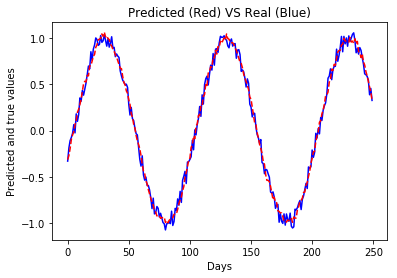

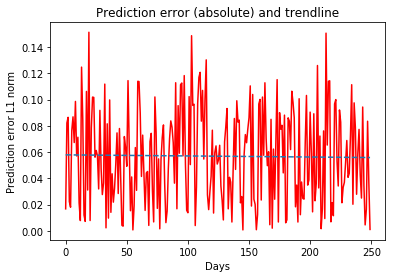

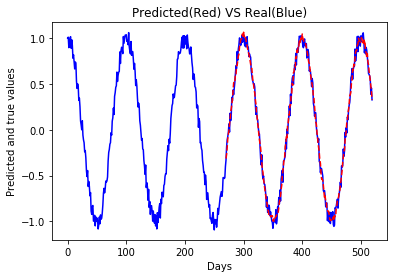

In [36]:
# ***Settings for the dataset creation
feat_dimension = 20
train_size    = 250
test_size     = 250

# Settings for tensorflow
learning_rate = 0.1
optimizer     = tf.train.AdamOptimizer
n_epochs      = 1000

# 관측 행렬 
cos_values = fetch_cosine_values(train_size + test_size + feat_dimension)
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, feat_dimension)

# 분석 속도를 높이기위해서 -> np.float32
train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X  = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y  = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)

# 플레이스홀더 정의 
X_tf = tf.placeholder("float", shape =(None, feat_dimension), name= "X")
y_tf = tf.placeholder("float", shape =(None, 1), name= "y")

weights = tf.Variable(tf.truncated_normal([feat_dimension, 1], mean = 0.0, stddev = 1.0), name="weights")
biases  = tf.Variable(tf.zeros([1,1]), name="bias")

y_pred   = regression_ANN(X_tf, weights, biases)
cost     = tf.reduce_mean(tf.square(y_tf- y_pred))
train_op = optimizer(learning_rate).minimize(cost)

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for i in range(n_epochs):
        train_cost,_ = sess.run([cost, train_op], feed_dict={X_tf:train_X, y_tf:train_y})
        print("Training iteration", i, "MSE", train_cost)
    
    test_cost, y_pr = sess.run([cost, y_pred], feed_dict={X_tf:test_X, y_tf: test_y})
    print("Test dataset: ", test_cost)
    #print("--->", y_pr )
    
    evaluate_ts(test_X, test_y, y_pr)
    
#     print(" evaluate_ts :", evaluate_ts(test_X, test_y, y_pr))
    plt.plot(range(len(cos_values)), cos_values, 'b')
    plt.plot(range(len(cos_values) - test_size, len(cos_values)), y_pr, 'r--')
    plt.xlabel("Days")
    plt.ylabel("Predicted and true values")
    plt.title("Predicted(Red) VS Real(Blue)")
    plt.show()

In [37]:
fetch_cosine_values(250 + 250 + 20)

array([ 1.00e+00,  1.01e+00,  8.98e-01,  9.17e-01,  1.01e+00,  1.02e+00,
        8.91e-01,  9.84e-01,  9.21e-01,  7.82e-01,  8.20e-01,  7.41e-01,
        6.65e-01,  7.42e-01,  7.31e-01,  5.34e-01,  4.53e-01,  5.02e-01,
        4.72e-01,  3.23e-01,  3.46e-01,  2.52e-01,  9.71e-02,  5.29e-02,
        1.84e-04,  9.89e-02, -5.87e-02, -1.10e-01, -1.40e-01, -2.40e-01,
       -2.26e-01, -3.07e-01, -4.45e-01, -5.10e-01, -4.45e-01, -6.19e-01,
       -5.64e-01, -6.18e-01, -7.21e-01, -6.86e-01, -8.90e-01, -9.24e-01,
       -8.36e-01, -8.27e-01, -9.98e-01, -9.96e-01, -9.34e-01, -1.05e+00,
       -9.52e-01, -1.00e+00, -9.64e-01, -9.94e-01, -1.08e+00, -1.04e+00,
       -9.54e-01, -1.03e+00, -9.30e-01, -9.77e-01, -9.66e-01, -9.09e-01,
       -8.21e-01, -6.95e-01, -6.39e-01, -6.89e-01, -6.45e-01, -5.60e-01,
       -5.71e-01, -5.58e-01, -5.16e-01, -3.41e-01, -2.47e-01, -2.15e-01,
       -1.57e-01, -1.40e-01, -3.15e-02, -5.82e-02,  9.48e-02,  1.31e-01,
        2.37e-01,  1.67e-01,  3.66e-01,  4.06e-01, 

In [38]:
minibatch_cos_X, minibatch_cos_y = format_dataset(fetch_cosine_values(250 + 250 + 20), 20)
format_dataset(fetch_cosine_values(250 + 250 + 20), 20)

(array([[1.  , 1.01, 0.9 , ..., 0.5 , 0.47, 0.32],
        [1.01, 0.9 , 0.92, ..., 0.47, 0.32, 0.35],
        [0.9 , 0.92, 1.01, ..., 0.32, 0.35, 0.25],
        ...,
        [0.94, 1.  , 0.91, ..., 0.61, 0.59, 0.55],
        [1.  , 0.91, 1.03, ..., 0.59, 0.55, 0.39],
        [0.91, 1.03, 0.97, ..., 0.55, 0.39, 0.46]]),
 array([ 3.46e-01,  2.52e-01,  9.71e-02,  5.29e-02,  1.84e-04,  9.89e-02,
        -5.87e-02, -1.10e-01, -1.40e-01, -2.40e-01, -2.26e-01, -3.07e-01,
        -4.45e-01, -5.10e-01, -4.45e-01, -6.19e-01, -5.64e-01, -6.18e-01,
        -7.21e-01, -6.86e-01, -8.90e-01, -9.24e-01, -8.36e-01, -8.27e-01,
        -9.98e-01, -9.96e-01, -9.34e-01, -1.05e+00, -9.52e-01, -1.00e+00,
        -9.64e-01, -9.94e-01, -1.08e+00, -1.04e+00, -9.54e-01, -1.03e+00,
        -9.30e-01, -9.77e-01, -9.66e-01, -9.09e-01, -8.21e-01, -6.95e-01,
        -6.39e-01, -6.89e-01, -6.45e-01, -5.60e-01, -5.71e-01, -5.58e-01,
        -5.16e-01, -3.41e-01, -2.47e-01, -2.15e-01, -1.57e-01, -1.40e-01,
        -3.15

In [39]:
minibatch_cos_X, minibatch_cos_y = format_dataset(fetch_cosine_values(250 + 250 + 20), 20)
#minibatch_cos_X[:train_size, :].astype(np.float32)
minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)

array([[ 3.46e-01],
       [ 2.52e-01],
       [ 9.71e-02],
       [ 5.29e-02],
       [ 1.84e-04],
       [ 9.89e-02],
       [-5.87e-02],
       [-1.10e-01],
       [-1.40e-01],
       [-2.40e-01],
       [-2.26e-01],
       [-3.07e-01],
       [-4.45e-01],
       [-5.10e-01],
       [-4.45e-01],
       [-6.19e-01],
       [-5.64e-01],
       [-6.18e-01],
       [-7.21e-01],
       [-6.86e-01],
       [-8.90e-01],
       [-9.24e-01],
       [-8.36e-01],
       [-8.27e-01],
       [-9.98e-01],
       [-9.96e-01],
       [-9.34e-01],
       [-1.05e+00],
       [-9.52e-01],
       [-1.00e+00],
       [-9.64e-01],
       [-9.94e-01],
       [-1.08e+00],
       [-1.04e+00],
       [-9.54e-01],
       [-1.03e+00],
       [-9.30e-01],
       [-9.77e-01],
       [-9.66e-01],
       [-9.09e-01],
       [-8.21e-01],
       [-6.95e-01],
       [-6.39e-01],
       [-6.89e-01],
       [-6.45e-01],
       [-5.60e-01],
       [-5.71e-01],
       [-5.58e-01],
       [-5.16e-01],
       [-3.41e-01],


Evaluation of the predictions :
MSE(평균 제곱 오차) :  0.0045451345
MAE(평균 절대 오차) :  0.05685015
Benchmark : if prediction == last feature
MSE :  0.96430165
mae :  0.79347515


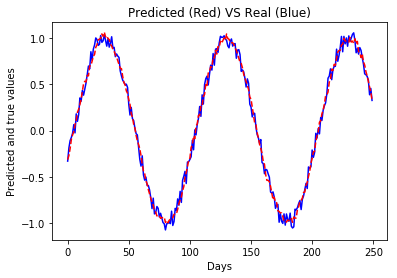

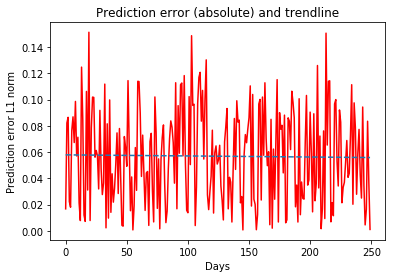

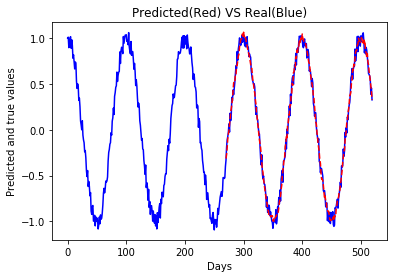

In [40]:
evaluate_ts(test_X, test_y, y_pr)

plt.plot(range(len(fetch_cosine_values(250 + 250 + 20))), fetch_cosine_values(250 + 250 + 20), 'b')
plt.plot(range(len(fetch_cosine_values(250 + 250 + 20))-test_size, len(fetch_cosine_values(250 + 250 + 20))), y_pr, 'r--')
plt.xlabel("Days")
plt.ylabel("Predicted and true values")
plt.title("Predicted(Red) VS Real(Blue)")
plt.show()

In [1]:
tf.reset_default_graph()
tf.set_random_seed(101)

# ***Settings for the dataset creation
feat_dimension = 20
train_size    = 250
test_size     = 250

# Settings for tensorflow
learning_rate = 0.1
optimizer     = tf.train.AdamOptimizer
n_epochs      = 1000

# 관측 행렬 
cos_values = fetch_cosine_values(train_size + test_size + feat_dimension)
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, feat_dimension)

# 분석 속도를 높이기위해서 -> np.float32
train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X  = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y  = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)

# 플레이스홀더 정의 
X_tf = tf.placeholder("float", shape =(None, feat_dimension), name= "X")
y_tf = tf.placeholder("float", shape =(None, 1), name= "y")

weights = tf.Variable(tf.truncated_normal([feat_dimension, 1], mean = 0.0, stddev = 1.0), name="weights")
biases  = tf.Variable(tf.zeros([1,1]), name="bias")

y_pred   = regression_ANN(X_tf, weights, biases)
cost     = tf.reduce_mean(tf.square(y_tf- y_pred))
train_op = optimizer(learning_rate).minimize(cost)

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for i in range(n_epochs):
        train_cost,_ = sess.run([cost, train_op], feed_dict={X_tf:train_X, y_tf:train_y})
        print("Training iteration", i, "MSE", train_cost)
    
    test_cost, y_pr = sess.run([cost, y_pred], feed_dict={X_tf:test_X, y_tf: test_y})
    print("Test dataset: ", test_cost)
    
    evaluate_ts(test_X, test_y, y_pr)
    
    plt.plot(range(len(cos_values)), cos_values, 'b')
    plt.plot(range(len(cos_values)-test_size, len(cos_values)), y_pr, 'r--')
    plt.xlabel("Days")
    plt.ylabel("Predicted and true values")
    plt.title("Predicted(Red) VS Real(Blue)")
    plt.show()

NameError: name 'tf' is not defined

In [42]:
tf.reset_default_graph()
tf.set_random_seed(101)

saved into ./tmp/prices/MSFT_2015-01-01_2016-12-31.pk
Training iteration 0 MSE 14826.294
Training iteration 1 MSE 5987.5396
Training iteration 2 MSE 1204.9418
Training iteration 3 MSE 45.0506
Training iteration 4 MSE 1283.6097
Training iteration 5 MSE 3083.824
Training iteration 6 MSE 4049.138
Training iteration 7 MSE 3847.5815
Training iteration 8 MSE 2844.5698
Training iteration 9 MSE 1596.224
Training iteration 10 MSE 577.83716
Training iteration 11 MSE 68.601974
Training iteration 12 MSE 111.4649
Training iteration 13 MSE 536.50037
Training iteration 14 MSE 1056.4852
Training iteration 15 MSE 1405.0071
Training iteration 16 MSE 1444.4305
Training iteration 17 MSE 1192.3842
Training iteration 18 MSE 777.44934
Training iteration 19 MSE 366.1814
Training iteration 20 MSE 95.393105
Training iteration 21 MSE 27.480646
Training iteration 22 MSE 137.69397
Training iteration 23 MSE 335.44794
Training iteration 24 MSE 510.27408
Training iteration 25 MSE 580.8292
Training iteration 26 MSE 52

Training iteration 262 MSE 14.892214
Training iteration 263 MSE 14.849924
Training iteration 264 MSE 14.807714
Training iteration 265 MSE 14.765573
Training iteration 266 MSE 14.7235
Training iteration 267 MSE 14.681503
Training iteration 268 MSE 14.639575
Training iteration 269 MSE 14.597734
Training iteration 270 MSE 14.555946
Training iteration 271 MSE 14.514242
Training iteration 272 MSE 14.472618
Training iteration 273 MSE 14.43106
Training iteration 274 MSE 14.3895855
Training iteration 275 MSE 14.348179
Training iteration 276 MSE 14.306864
Training iteration 277 MSE 14.265615
Training iteration 278 MSE 14.224447
Training iteration 279 MSE 14.183356
Training iteration 280 MSE 14.142346
Training iteration 281 MSE 14.101417
Training iteration 282 MSE 14.060561
Training iteration 283 MSE 14.019789
Training iteration 284 MSE 13.979091
Training iteration 285 MSE 13.938478
Training iteration 286 MSE 13.897948
Training iteration 287 MSE 13.857501
Training iteration 288 MSE 13.817137
Tra

Training iteration 511 MSE 7.1738377
Training iteration 512 MSE 7.1545086
Training iteration 513 MSE 7.1352634
Training iteration 514 MSE 7.116096
Training iteration 515 MSE 7.0970135
Training iteration 516 MSE 7.078014
Training iteration 517 MSE 7.059095
Training iteration 518 MSE 7.040261
Training iteration 519 MSE 7.021503
Training iteration 520 MSE 7.002833
Training iteration 521 MSE 6.984241
Training iteration 522 MSE 6.9657245
Training iteration 523 MSE 6.9472976
Training iteration 524 MSE 6.92895
Training iteration 525 MSE 6.9106774
Training iteration 526 MSE 6.892487
Training iteration 527 MSE 6.8743773
Training iteration 528 MSE 6.856348
Training iteration 529 MSE 6.8383965
Training iteration 530 MSE 6.8205237
Training iteration 531 MSE 6.8027277
Training iteration 532 MSE 6.7850122
Training iteration 533 MSE 6.7673783
Training iteration 534 MSE 6.749825
Training iteration 535 MSE 6.7323413
Training iteration 536 MSE 6.7149434
Training iteration 537 MSE 6.6976156
Training iter

Training iteration 761 MSE 4.3257394
Training iteration 762 MSE 4.320027
Training iteration 763 MSE 4.314344
Training iteration 764 MSE 4.308693
Training iteration 765 MSE 4.303071
Training iteration 766 MSE 4.2974744
Training iteration 767 MSE 4.291909
Training iteration 768 MSE 4.2863727
Training iteration 769 MSE 4.2808585
Training iteration 770 MSE 4.275374
Training iteration 771 MSE 4.269922
Training iteration 772 MSE 4.2644925
Training iteration 773 MSE 4.2590895
Training iteration 774 MSE 4.2537174
Training iteration 775 MSE 4.2483706
Training iteration 776 MSE 4.2430506
Training iteration 777 MSE 4.2377577
Training iteration 778 MSE 4.232491
Training iteration 779 MSE 4.2272496
Training iteration 780 MSE 4.2220364
Training iteration 781 MSE 4.216847
Training iteration 782 MSE 4.211684
Training iteration 783 MSE 4.206548
Training iteration 784 MSE 4.2014365
Training iteration 785 MSE 4.196353
Training iteration 786 MSE 4.1912913
Training iteration 787 MSE 4.186253
Training itera

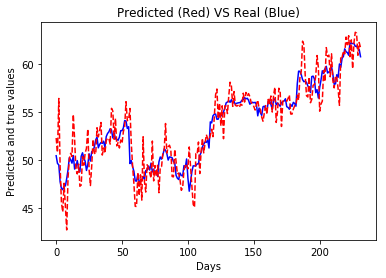

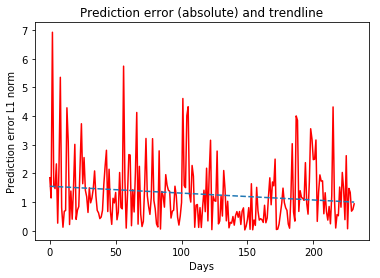

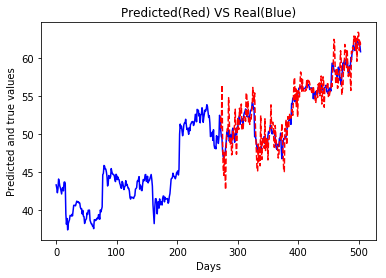

In [44]:
symbol         = "MSFT"
feat_dimension = 20
train_size     = 252
test_size      = 252 - feat_dimension

# 텐서 플로우 설정 
learning_rate = 0.05
optimizer     = tf.train.AdamOptimizer
n_epochs      = 1000

# 주가를 가져와 훈련데이터와 테스트 데이터를 분할
stock_values = fetch_stock_price(symbol, datetime.date(2015,1,1), datetime.date(2016,12,31))
minibatch_stock_X, minibatch_stock_y = format_dataset(stock_values, feat_dimension)

# 분석 속도를 높이기위해서 -> np.float32
train_X = minibatch_stock_X[:train_size, :].astype(np.float32)
train_y = minibatch_stock_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X  = minibatch_stock_X[train_size:, :].astype(np.float32)
test_y  = minibatch_stock_y[train_size:].reshape((-1, 1)).astype(np.float32)

X_tf = tf.placeholder("float", shape = (None, feat_dimension), name= "X")
y_tf = tf.placeholder("float", shape = (None, 1), name= "y")

weights = tf.Variable(tf.truncated_normal([feat_dimension, 1], mean = 0.0, stddev = 1.0), name="weights")
biases  = tf.Variable(tf.zeros([1,1]), name = "bias")

y_pred   = regression_ANN(X_tf, weights, biases)
cost     = tf.reduce_mean(tf.square(y_tf- y_pred))
train_op = optimizer(learning_rate).minimize(cost)

with tf.Session() as sess :
    # 변수 초기화 
    sess.run(tf.global_variables_initializer())
    # 한 세대마다 전체 훈련 데이터 셋이 텐서플로 그래프에 공급 
    
    for i in range(n_epochs):
        train_cost,_ = sess.run([cost, train_op], feed_dict={X_tf:train_X, y_tf:train_y})
        print("Training iteration", i, "MSE", train_cost)
    
    test_cost, y_pr = sess.run([cost, y_pred], feed_dict={X_tf:test_X, y_tf:test_y})
    print("Test dataset: ", test_cost)
    
    evaluate_ts(test_X, test_y, y_pr)
    
    plt.plot(range(len(stock_values)), stock_values, 'b')
    plt.plot(range(len(stock_values)-test_size, len(stock_values)), y_pr, 'r--')
    plt.xlabel("Days")
    plt.ylabel("Predicted and true values")
    plt.title("Predicted(Red) VS Real(Blue)")
    plt.show()

saved into ./tmp/prices/MSFT_2015-01-01_2016-12-31.pk
Training iteration 0 MSE 18262.947
Training iteration 1 MSE 95701.08
Training iteration 2 MSE 15730.171
Training iteration 3 MSE 11423.815
Training iteration 4 MSE 46509.61
Training iteration 5 MSE 30471.55
Training iteration 6 MSE 3017.6663
Training iteration 7 MSE 5680.4478
Training iteration 8 MSE 23611.893
Training iteration 9 MSE 23396.107
Training iteration 10 MSE 7970.9585
Training iteration 11 MSE 22.193972
Training iteration 12 MSE 7235.1855
Training iteration 13 MSE 15333.591
Training iteration 14 MSE 11998.016
Training iteration 15 MSE 2986.4517
Training iteration 16 MSE 271.5018
Training iteration 17 MSE 5474.0444
Training iteration 18 MSE 9445.633
Training iteration 19 MSE 6449.6006
Training iteration 20 MSE 1158.4609
Training iteration 21 MSE 475.5668
Training iteration 22 MSE 4030.162
Training iteration 23 MSE 5791.1895
Training iteration 24 MSE 3265.3247
Training iteration 25 MSE 296.0517
Training iteration 26 MSE 71

Training iteration 248 MSE 8.336481
Training iteration 249 MSE 8.322215
Training iteration 250 MSE 8.307988
Training iteration 251 MSE 8.293791
Training iteration 252 MSE 8.279618
Training iteration 253 MSE 8.265485
Training iteration 254 MSE 8.251378
Training iteration 255 MSE 8.237302
Training iteration 256 MSE 8.223257
Training iteration 257 MSE 8.209246
Training iteration 258 MSE 8.195264
Training iteration 259 MSE 8.181306
Training iteration 260 MSE 8.167386
Training iteration 261 MSE 8.153502
Training iteration 262 MSE 8.139641
Training iteration 263 MSE 8.125811
Training iteration 264 MSE 8.112
Training iteration 265 MSE 8.098232
Training iteration 266 MSE 8.084495
Training iteration 267 MSE 8.0707855
Training iteration 268 MSE 8.057108
Training iteration 269 MSE 8.043463
Training iteration 270 MSE 8.029837
Training iteration 271 MSE 8.016257
Training iteration 272 MSE 8.002698
Training iteration 273 MSE 7.9891615
Training iteration 274 MSE 7.975666
Training iteration 275 MSE 7.

Training iteration 497 MSE 5.650734
Training iteration 498 MSE 5.6430345
Training iteration 499 MSE 5.6353602
Training iteration 500 MSE 5.627712
Training iteration 501 MSE 5.620075
Training iteration 502 MSE 5.6124587
Training iteration 503 MSE 5.6048684
Training iteration 504 MSE 5.5972953
Training iteration 505 MSE 5.5897436
Training iteration 506 MSE 5.582212
Training iteration 507 MSE 5.574708
Training iteration 508 MSE 5.567213
Training iteration 509 MSE 5.559746
Training iteration 510 MSE 5.552299
Training iteration 511 MSE 5.544873
Training iteration 512 MSE 5.5374646
Training iteration 513 MSE 5.5300794
Training iteration 514 MSE 5.5227146
Training iteration 515 MSE 5.51537
Training iteration 516 MSE 5.508046
Training iteration 517 MSE 5.500744
Training iteration 518 MSE 5.4934583
Training iteration 519 MSE 5.4861946
Training iteration 520 MSE 5.4789424
Training iteration 521 MSE 5.471728
Training iteration 522 MSE 5.4645143
Training iteration 523 MSE 5.4573255
Training iterat

Training iteration 747 MSE 4.254508
Training iteration 748 MSE 4.2505345
Training iteration 749 MSE 4.2465806
Training iteration 750 MSE 4.242626
Training iteration 751 MSE 4.2386837
Training iteration 752 MSE 4.234753
Training iteration 753 MSE 4.2308297
Training iteration 754 MSE 4.226917
Training iteration 755 MSE 4.2230086
Training iteration 756 MSE 4.219113
Training iteration 757 MSE 4.2152233
Training iteration 758 MSE 4.211356
Training iteration 759 MSE 4.2074714
Training iteration 760 MSE 4.203613
Training iteration 761 MSE 4.19976
Training iteration 762 MSE 4.1959186
Training iteration 763 MSE 4.1920724
Training iteration 764 MSE 4.1882467
Training iteration 765 MSE 4.1844287
Training iteration 766 MSE 4.180619
Training iteration 767 MSE 4.1768107
Training iteration 768 MSE 4.173027
Training iteration 769 MSE 4.1692367
Training iteration 770 MSE 4.165455
Training iteration 771 MSE 4.1616898
Training iteration 772 MSE 4.157928
Training iteration 773 MSE 4.1541767
Training itera

Training iteration 997 MSE 3.465753
Training iteration 998 MSE 3.4631667
Training iteration 999 MSE 3.4605823
Training iteration 1000 MSE 3.4580104
Training iteration 1001 MSE 3.4554398
Training iteration 1002 MSE 3.4528697
Training iteration 1003 MSE 3.4503012
Training iteration 1004 MSE 3.4477406
Training iteration 1005 MSE 3.4451754
Training iteration 1006 MSE 3.4426188
Training iteration 1007 MSE 3.4400647
Training iteration 1008 MSE 3.43751
Training iteration 1009 MSE 3.434958
Training iteration 1010 MSE 3.4324105
Training iteration 1011 MSE 3.4298728
Training iteration 1012 MSE 3.4273257
Training iteration 1013 MSE 3.4247947
Training iteration 1014 MSE 3.4222603
Training iteration 1015 MSE 3.4197228
Training iteration 1016 MSE 3.4172006
Training iteration 1017 MSE 3.414672
Training iteration 1018 MSE 3.4121478
Training iteration 1019 MSE 3.4096317
Training iteration 1020 MSE 3.4071138
Training iteration 1021 MSE 3.4045978
Training iteration 1022 MSE 3.4020903
Training iteration 1

Training iteration 1237 MSE 2.915914
Training iteration 1238 MSE 2.913869
Training iteration 1239 MSE 2.9118133
Training iteration 1240 MSE 2.9097655
Training iteration 1241 MSE 2.9077175
Training iteration 1242 MSE 2.9056678
Training iteration 1243 MSE 2.9036255
Training iteration 1244 MSE 2.9015846
Training iteration 1245 MSE 2.899542
Training iteration 1246 MSE 2.8974972
Training iteration 1247 MSE 2.8954644
Training iteration 1248 MSE 2.8934305
Training iteration 1249 MSE 2.8913937
Training iteration 1250 MSE 2.889363
Training iteration 1251 MSE 2.8873274
Training iteration 1252 MSE 2.8853025
Training iteration 1253 MSE 2.8832798
Training iteration 1254 MSE 2.8812504
Training iteration 1255 MSE 2.8792272
Training iteration 1256 MSE 2.8772037
Training iteration 1257 MSE 2.875183
Training iteration 1258 MSE 2.873161
Training iteration 1259 MSE 2.8711412
Training iteration 1260 MSE 2.8691318
Training iteration 1261 MSE 2.8671112
Training iteration 1262 MSE 2.8651004
Training iteration

Training iteration 1496 MSE 2.5373545
Training iteration 1497 MSE 2.481831
Training iteration 1498 MSE 2.6364222
Training iteration 1499 MSE 2.697459
Training iteration 1500 MSE 2.5666265
Training iteration 1501 MSE 2.462147
Training iteration 1502 MSE 2.521481
Training iteration 1503 MSE 2.6066961
Training iteration 1504 MSE 2.5684257
Training iteration 1505 MSE 2.4745612
Training iteration 1506 MSE 2.464984
Training iteration 1507 MSE 2.5268497
Training iteration 1508 MSE 2.5437021
Training iteration 1509 MSE 2.489486
Training iteration 1510 MSE 2.4494288
Training iteration 1511 MSE 2.4720397
Training iteration 1512 MSE 2.504783
Training iteration 1513 MSE 2.4909344
Training iteration 1514 MSE 2.453198
Training iteration 1515 MSE 2.4450405
Training iteration 1516 MSE 2.4671845
Training iteration 1517 MSE 2.4769073
Training iteration 1518 MSE 2.4578657
Training iteration 1519 MSE 2.4382129
Training iteration 1520 MSE 2.4417994
Training iteration 1521 MSE 2.4551866
Training iteration 1

Training iteration 1746 MSE 2.1527095
Training iteration 1747 MSE 2.151767
Training iteration 1748 MSE 2.1509876
Training iteration 1749 MSE 2.1504939
Training iteration 1750 MSE 2.1505044
Training iteration 1751 MSE 2.151414
Training iteration 1752 MSE 2.1539202
Training iteration 1753 MSE 2.1592958
Training iteration 1754 MSE 2.1698525
Training iteration 1755 MSE 2.1898685
Training iteration 1756 MSE 2.2272058
Training iteration 1757 MSE 2.2965257
Training iteration 1758 MSE 2.425302
Training iteration 1759 MSE 2.6652832
Training iteration 1760 MSE 3.1146028
Training iteration 1761 MSE 3.9605386
Training iteration 1762 MSE 5.562689
Training iteration 1763 MSE 8.615491
Training iteration 1764 MSE 14.467545
Training iteration 1765 MSE 25.750774
Training iteration 1766 MSE 47.621235
Training iteration 1767 MSE 90.1973
Training iteration 1768 MSE 173.28848
Training iteration 1769 MSE 335.27625
Training iteration 1770 MSE 648.5561
Training iteration 1771 MSE 1241.436
Training iteration 17

Training iteration 1996 MSE 1.9221033
Training iteration 1997 MSE 1.9212602
Training iteration 1998 MSE 1.9204202
Training iteration 1999 MSE 1.919576
Training iteration 2000 MSE 1.9187332
Training iteration 2001 MSE 1.9178896
Training iteration 2002 MSE 1.9170463
Training iteration 2003 MSE 1.9162054
Training iteration 2004 MSE 1.9153662
Training iteration 2005 MSE 1.9145252
Training iteration 2006 MSE 1.913689
Training iteration 2007 MSE 1.9128454
Training iteration 2008 MSE 1.9120059
Training iteration 2009 MSE 1.9111634
Training iteration 2010 MSE 1.9103256
Training iteration 2011 MSE 1.9094863
Training iteration 2012 MSE 1.9086504
Training iteration 2013 MSE 1.9078109
Training iteration 2014 MSE 1.9069726
Training iteration 2015 MSE 1.9061382
Training iteration 2016 MSE 1.9053012
Training iteration 2017 MSE 1.9044664
Training iteration 2018 MSE 1.9036257
Training iteration 2019 MSE 1.9027919
Training iteration 2020 MSE 1.9019599
Training iteration 2021 MSE 1.9011251
Training itera

Training iteration 2245 MSE 2.4062977
Training iteration 2246 MSE 1.9420888
Training iteration 2247 MSE 1.7471071
Training iteration 2248 MSE 2.0414417
Training iteration 2249 MSE 2.1990416
Training iteration 2250 MSE 1.9437791
Training iteration 2251 MSE 1.734808
Training iteration 2252 MSE 1.8710276
Training iteration 2253 MSE 2.033734
Training iteration 2254 MSE 1.9252393
Training iteration 2255 MSE 1.747536
Training iteration 2256 MSE 1.7781057
Training iteration 2257 MSE 1.9076694
Training iteration 2258 MSE 1.8908212
Training iteration 2259 MSE 1.7654285
Training iteration 2260 MSE 1.7368453
Training iteration 2261 MSE 1.8184144
Training iteration 2262 MSE 1.847531
Training iteration 2263 MSE 1.7768377
Training iteration 2264 MSE 1.7262605
Training iteration 2265 MSE 1.7620298
Training iteration 2266 MSE 1.8034123
Training iteration 2267 MSE 1.7771724
Training iteration 2268 MSE 1.7298594
Training iteration 2269 MSE 1.7322865
Training iteration 2270 MSE 1.7654603
Training iterati

Training iteration 2495 MSE 1.5937058
Training iteration 2496 MSE 1.5931585
Training iteration 2497 MSE 1.592605
Training iteration 2498 MSE 1.5920539
Training iteration 2499 MSE 1.5915043
Training iteration 2500 MSE 1.5909551
Training iteration 2501 MSE 1.5904032
Training iteration 2502 MSE 1.589854
Training iteration 2503 MSE 1.5893071
Training iteration 2504 MSE 1.5887533
Training iteration 2505 MSE 1.5882082
Training iteration 2506 MSE 1.5876569
Training iteration 2507 MSE 1.58711
Training iteration 2508 MSE 1.5865619
Training iteration 2509 MSE 1.5860169
Training iteration 2510 MSE 1.5854667
Training iteration 2511 MSE 1.5849159
Training iteration 2512 MSE 1.5843724
Training iteration 2513 MSE 1.5838231
Training iteration 2514 MSE 1.5832756
Training iteration 2515 MSE 1.5827278
Training iteration 2516 MSE 1.5821824
Training iteration 2517 MSE 1.5816379
Training iteration 2518 MSE 1.5810894
Training iteration 2519 MSE 1.5805452
Training iteration 2520 MSE 1.5799992
Training iterati

Training iteration 2745 MSE 1.4763323
Training iteration 2746 MSE 1.4759393
Training iteration 2747 MSE 1.47554
Training iteration 2748 MSE 1.4751079
Training iteration 2749 MSE 1.4746536
Training iteration 2750 MSE 1.4741997
Training iteration 2751 MSE 1.4737589
Training iteration 2752 MSE 1.4733422
Training iteration 2753 MSE 1.4729328
Training iteration 2754 MSE 1.4725231
Training iteration 2755 MSE 1.4720929
Training iteration 2756 MSE 1.4716556
Training iteration 2757 MSE 1.4712143
Training iteration 2758 MSE 1.470783
Training iteration 2759 MSE 1.4703587
Training iteration 2760 MSE 1.4699427
Training iteration 2761 MSE 1.4695241
Training iteration 2762 MSE 1.4691008
Training iteration 2763 MSE 1.4686735
Training iteration 2764 MSE 1.468241
Training iteration 2765 MSE 1.4678129
Training iteration 2766 MSE 1.4673861
Training iteration 2767 MSE 1.4669635
Training iteration 2768 MSE 1.4665462
Training iteration 2769 MSE 1.4661248
Training iteration 2770 MSE 1.465699
Training iteratio

Training iteration 2994 MSE 2.4135003
Training iteration 2995 MSE 2.509911
Training iteration 2996 MSE 1.904383
Training iteration 2997 MSE 1.4042133
Training iteration 2998 MSE 1.5381801
Training iteration 2999 MSE 1.9667795
Training iteration 3000 MSE 2.0647273
Training iteration 3001 MSE 1.7315623
Training iteration 3002 MSE 1.4081056
Training iteration 3003 MSE 1.4420251
Training iteration 3004 MSE 1.6921554
Training iteration 3005 MSE 1.7920173
Training iteration 3006 MSE 1.6260325
Training iteration 3007 MSE 1.4151715
Training iteration 3008 MSE 1.3921628
Training iteration 3009 MSE 1.5285646
Training iteration 3010 MSE 1.6191933
Training iteration 3011 MSE 1.5529692
Training iteration 3012 MSE 1.4212414
Training iteration 3013 MSE 1.3734769
Training iteration 3014 MSE 1.4362375
Training iteration 3015 MSE 1.507528
Training iteration 3016 MSE 1.496586
Training iteration 3017 MSE 1.422829
Training iteration 3018 MSE 1.3723359
Training iteration 3019 MSE 1.3894858
Training iteratio

Training iteration 3244 MSE 5.694784
Training iteration 3245 MSE 9.39045
Training iteration 3246 MSE 16.27745
Training iteration 3247 MSE 29.17773
Training iteration 3248 MSE 53.45309
Training iteration 3249 MSE 99.30017
Training iteration 3250 MSE 186.0488
Training iteration 3251 MSE 349.9431
Training iteration 3252 MSE 657.17267
Training iteration 3253 MSE 1221.7224
Training iteration 3254 MSE 2215.1624
Training iteration 3255 MSE 3814.1926
Training iteration 3256 MSE 5954.1113
Training iteration 3257 MSE 7809.0425
Training iteration 3258 MSE 7648.525
Training iteration 3259 MSE 4595.612
Training iteration 3260 MSE 960.4083
Training iteration 3261 MSE 141.84607
Training iteration 3262 MSE 2173.2927
Training iteration 3263 MSE 3878.443
Training iteration 3264 MSE 2886.1716
Training iteration 3265 MSE 618.72394
Training iteration 3266 MSE 129.77881
Training iteration 3267 MSE 1538.5227
Training iteration 3268 MSE 2276.36
Training iteration 3269 MSE 1185.2931
Training iteration 3270 MSE

Training iteration 3494 MSE 1.2304499
Training iteration 3495 MSE 1.2301937
Training iteration 3496 MSE 1.2299356
Training iteration 3497 MSE 1.2296797
Training iteration 3498 MSE 1.229421
Training iteration 3499 MSE 1.2291659
Training iteration 3500 MSE 1.2289041
Training iteration 3501 MSE 1.2286489
Training iteration 3502 MSE 1.2283949
Training iteration 3503 MSE 1.2281381
Training iteration 3504 MSE 1.2278806
Training iteration 3505 MSE 1.2276225
Training iteration 3506 MSE 1.2273679
Training iteration 3507 MSE 1.2271115
Training iteration 3508 MSE 1.2268546
Training iteration 3509 MSE 1.2265981
Training iteration 3510 MSE 1.2263408
Training iteration 3511 MSE 1.2260861
Training iteration 3512 MSE 1.2258254
Training iteration 3513 MSE 1.2255734
Training iteration 3514 MSE 1.2253171
Training iteration 3515 MSE 1.225059
Training iteration 3516 MSE 1.2248032
Training iteration 3517 MSE 1.2245442
Training iteration 3518 MSE 1.2242898
Training iteration 3519 MSE 1.2240347
Training itera

Training iteration 3739 MSE 1.3562168
Training iteration 3740 MSE 1.4579365
Training iteration 3741 MSE 1.3395841
Training iteration 3742 MSE 1.188413
Training iteration 3743 MSE 1.2031491
Training iteration 3744 MSE 1.3159664
Training iteration 3745 MSE 1.3382034
Training iteration 3746 MSE 1.2435458
Training iteration 3747 MSE 1.1721838
Training iteration 3748 MSE 1.2065696
Training iteration 3749 MSE 1.27044
Training iteration 3750 MSE 1.2631938
Training iteration 3751 MSE 1.2004169
Training iteration 3752 MSE 1.1700538
Training iteration 3753 MSE 1.2003256
Training iteration 3754 MSE 1.2337217
Training iteration 3755 MSE 1.220205
Training iteration 3756 MSE 1.1819426
Training iteration 3757 MSE 1.1698626
Training iteration 3758 MSE 1.1910675
Training iteration 3759 MSE 1.208114
Training iteration 3760 MSE 1.1965196
Training iteration 3761 MSE 1.1739316
Training iteration 3762 MSE 1.1690445
Training iteration 3763 MSE 1.1824613
Training iteration 3764 MSE 1.1914276
Training iteratio

Training iteration 3993 MSE 1.1205086
Training iteration 3994 MSE 1.1203059
Training iteration 3995 MSE 1.1201072
Training iteration 3996 MSE 1.1199049
Training iteration 3997 MSE 1.119711
Training iteration 3998 MSE 1.1195165
Training iteration 3999 MSE 1.1193247
Training iteration 4000 MSE 1.1191471
Training iteration 4001 MSE 1.1189824
Training iteration 4002 MSE 1.1188341
Training iteration 4003 MSE 1.1187251
Training iteration 4004 MSE 1.1186697
Training iteration 4005 MSE 1.1187056
Training iteration 4006 MSE 1.1188905
Training iteration 4007 MSE 1.1193202
Training iteration 4008 MSE 1.1201503
Training iteration 4009 MSE 1.1216607
Training iteration 4010 MSE 1.1243062
Training iteration 4011 MSE 1.1288685
Training iteration 4012 MSE 1.1366878
Training iteration 4013 MSE 1.1500862
Training iteration 4014 MSE 1.1730784
Training iteration 4015 MSE 1.212694
Training iteration 4016 MSE 1.2812678
Training iteration 4017 MSE 1.4006057
Training iteration 4018 MSE 1.60947
Training iterati

Training iteration 4243 MSE 1.0763695
Training iteration 4244 MSE 1.0761999
Training iteration 4245 MSE 1.076031
Training iteration 4246 MSE 1.0758619
Training iteration 4247 MSE 1.0756899
Training iteration 4248 MSE 1.0755165
Training iteration 4249 MSE 1.0753458
Training iteration 4250 MSE 1.0751755
Training iteration 4251 MSE 1.075004
Training iteration 4252 MSE 1.0748336
Training iteration 4253 MSE 1.0746624
Training iteration 4254 MSE 1.0744914
Training iteration 4255 MSE 1.0743209
Training iteration 4256 MSE 1.0741493
Training iteration 4257 MSE 1.0739794
Training iteration 4258 MSE 1.0738074
Training iteration 4259 MSE 1.0736363
Training iteration 4260 MSE 1.0734661
Training iteration 4261 MSE 1.0732948
Training iteration 4262 MSE 1.0731229
Training iteration 4263 MSE 1.0729554
Training iteration 4264 MSE 1.0727838
Training iteration 4265 MSE 1.0726116
Training iteration 4266 MSE 1.0724381
Training iteration 4267 MSE 1.0722708
Training iteration 4268 MSE 1.0720994
Training itera

Training iteration 4492 MSE 1.0488861
Training iteration 4493 MSE 1.094641
Training iteration 4494 MSE 1.2565722
Training iteration 4495 MSE 1.2861539
Training iteration 4496 MSE 1.1532682
Training iteration 4497 MSE 1.0412673
Training iteration 4498 MSE 1.0732017
Training iteration 4499 MSE 1.1687812
Training iteration 4500 MSE 1.1848239
Training iteration 4501 MSE 1.1060708
Training iteration 4502 MSE 1.0388455
Training iteration 4503 MSE 1.0555452
Training iteration 4504 MSE 1.1121095
Training iteration 4505 MSE 1.1249013
Training iteration 4506 MSE 1.0805063
Training iteration 4507 MSE 1.0381137
Training iteration 4508 MSE 1.0435462
Training iteration 4509 MSE 1.0766749
Training iteration 4510 MSE 1.0885202
Training iteration 4511 MSE 1.0653474
Training iteration 4512 MSE 1.0379938
Training iteration 4513 MSE 1.0365613
Training iteration 4514 MSE 1.0551031
Training iteration 4515 MSE 1.0656849
Training iteration 4516 MSE 1.0552986
Training iteration 4517 MSE 1.0379624
Training iter

Training iteration 4742 MSE 1.0049855
Training iteration 4743 MSE 1.0077909
Training iteration 4744 MSE 1.012575
Training iteration 4745 MSE 1.0207144
Training iteration 4746 MSE 1.034587
Training iteration 4747 MSE 1.0583129
Training iteration 4748 MSE 1.0990659
Training iteration 4749 MSE 1.1694291
Training iteration 4750 MSE 1.291596
Training iteration 4751 MSE 1.504941
Training iteration 4752 MSE 1.8796923
Training iteration 4753 MSE 2.5418499
Training iteration 4754 MSE 3.718709
Training iteration 4755 MSE 5.822475
Training iteration 4756 MSE 9.604567
Training iteration 4757 MSE 16.441256
Training iteration 4758 MSE 28.863726
Training iteration 4759 MSE 51.540897
Training iteration 4760 MSE 93.092476
Training iteration 4761 MSE 169.38644
Training iteration 4762 MSE 309.3458
Training iteration 4763 MSE 564.46497
Training iteration 4764 MSE 1021.87573
Training iteration 4765 MSE 1813.3715
Training iteration 4766 MSE 3088.3206
Training iteration 4767 MSE 4867.886
Training iteration 4

Training iteration 5030 MSE 0.96424824
Training iteration 5031 MSE 0.9641258
Training iteration 5032 MSE 0.9639996
Training iteration 5033 MSE 0.96387386
Training iteration 5034 MSE 0.96374935
Training iteration 5035 MSE 0.9636243
Training iteration 5036 MSE 0.96349734
Training iteration 5037 MSE 0.963376
Training iteration 5038 MSE 0.9632494
Training iteration 5039 MSE 0.9631264
Training iteration 5040 MSE 0.9629996
Training iteration 5041 MSE 0.96287453
Training iteration 5042 MSE 0.96275055
Training iteration 5043 MSE 0.96262354
Training iteration 5044 MSE 0.9624988
Training iteration 5045 MSE 0.96237546
Training iteration 5046 MSE 0.9622507
Training iteration 5047 MSE 0.9621244
Training iteration 5048 MSE 0.9620004
Training iteration 5049 MSE 0.9618763
Training iteration 5050 MSE 0.9617501
Training iteration 5051 MSE 0.96162474
Training iteration 5052 MSE 0.96149945
Training iteration 5053 MSE 0.9613753
Training iteration 5054 MSE 0.9612501
Training iteration 5055 MSE 0.9611253
Tra

Training iteration 5366 MSE 0.926451
Training iteration 5367 MSE 0.92634195
Training iteration 5368 MSE 0.9262355
Training iteration 5369 MSE 0.9261234
Training iteration 5370 MSE 0.92601705
Training iteration 5371 MSE 0.9259076
Training iteration 5372 MSE 0.9257989
Training iteration 5373 MSE 0.9256925
Training iteration 5374 MSE 0.9255823
Training iteration 5375 MSE 0.9254736
Training iteration 5376 MSE 0.92536616
Training iteration 5377 MSE 0.92525566
Training iteration 5378 MSE 0.92514753
Training iteration 5379 MSE 0.925037
Training iteration 5380 MSE 0.924931
Training iteration 5381 MSE 0.9248196
Training iteration 5382 MSE 0.92471117
Training iteration 5383 MSE 0.9246034
Training iteration 5384 MSE 0.92449313
Training iteration 5385 MSE 0.92438656
Training iteration 5386 MSE 0.92427784
Training iteration 5387 MSE 0.92416745
Training iteration 5388 MSE 0.92405957
Training iteration 5389 MSE 0.9239474
Training iteration 5390 MSE 0.9238395
Training iteration 5391 MSE 0.9237321
Trai

Training iteration 5616 MSE 0.907599
Training iteration 5617 MSE 0.9047058
Training iteration 5618 MSE 0.9016717
Training iteration 5619 MSE 0.90094864
Training iteration 5620 MSE 0.90242857
Training iteration 5621 MSE 0.9040655
Training iteration 5622 MSE 0.90408844
Training iteration 5623 MSE 0.9025339
Training iteration 5624 MSE 0.90083987
Training iteration 5625 MSE 0.900302
Training iteration 5626 MSE 0.9009642
Training iteration 5627 MSE 0.90183175
Training iteration 5628 MSE 0.90194017
Training iteration 5629 MSE 0.90117246
Training iteration 5630 MSE 0.900188
Training iteration 5631 MSE 0.8997075
Training iteration 5632 MSE 0.8998954
Training iteration 5633 MSE 0.9003266
Training iteration 5634 MSE 0.9004771
Training iteration 5635 MSE 0.9001489
Training iteration 5636 MSE 0.8995853
Training iteration 5637 MSE 0.8991674
Training iteration 5638 MSE 0.8990986
Training iteration 5639 MSE 0.8992582
Training iteration 5640 MSE 0.8993756
Training iteration 5641 MSE 0.89926994
Trainin

Training iteration 5840 MSE 2006.8812
Training iteration 5841 MSE 1545.2043
Training iteration 5842 MSE 324.20514
Training iteration 5843 MSE 78.99158
Training iteration 5844 MSE 854.8396
Training iteration 5845 MSE 1227.6997
Training iteration 5846 MSE 623.5494
Training iteration 5847 MSE 24.19324
Training iteration 5848 MSE 239.332
Training iteration 5849 MSE 719.8426
Training iteration 5850 MSE 627.49316
Training iteration 5851 MSE 147.50859
Training iteration 5852 MSE 26.140034
Training iteration 5853 MSE 331.18033
Training iteration 5854 MSE 474.342
Training iteration 5855 MSE 227.93358
Training iteration 5856 MSE 5.5237064
Training iteration 5857 MSE 110.224304
Training iteration 5858 MSE 291.3963
Training iteration 5859 MSE 231.96173
Training iteration 5860 MSE 44.443718
Training iteration 5861 MSE 18.148375
Training iteration 5862 MSE 143.67586
Training iteration 5863 MSE 184.19151
Training iteration 5864 MSE 78.746056
Training iteration 5865 MSE 1.2113732
Training iteration 58

Training iteration 6116 MSE 0.8566451
Training iteration 6117 MSE 0.8565583
Training iteration 6118 MSE 0.85647386
Training iteration 6119 MSE 0.856388
Training iteration 6120 MSE 0.8563023
Training iteration 6121 MSE 0.85621727
Training iteration 6122 MSE 0.8561302
Training iteration 6123 MSE 0.8560453
Training iteration 6124 MSE 0.8559595
Training iteration 6125 MSE 0.8558759
Training iteration 6126 MSE 0.8557894
Training iteration 6127 MSE 0.85570294
Training iteration 6128 MSE 0.8556174
Training iteration 6129 MSE 0.85553217
Training iteration 6130 MSE 0.85544753
Training iteration 6131 MSE 0.8553602
Training iteration 6132 MSE 0.8552757
Training iteration 6133 MSE 0.8551896
Training iteration 6134 MSE 0.8551035
Training iteration 6135 MSE 0.8550186
Training iteration 6136 MSE 0.8549334
Training iteration 6137 MSE 0.8548468
Training iteration 6138 MSE 0.85476106
Training iteration 6139 MSE 0.8546751
Training iteration 6140 MSE 0.8545905
Training iteration 6141 MSE 0.8545032
Trainin

Training iteration 6365 MSE 0.8374664
Training iteration 6366 MSE 0.8374596
Training iteration 6367 MSE 0.83745986
Training iteration 6368 MSE 0.8373896
Training iteration 6369 MSE 0.8372542
Training iteration 6370 MSE 0.8371116
Training iteration 6371 MSE 0.8370215
Training iteration 6372 MSE 0.83698404
Training iteration 6373 MSE 0.83695006
Training iteration 6374 MSE 0.83687896
Training iteration 6375 MSE 0.83677346
Training iteration 6376 MSE 0.8366646
Training iteration 6377 MSE 0.8365789
Training iteration 6378 MSE 0.83652174
Training iteration 6379 MSE 0.8364691
Training iteration 6380 MSE 0.83640206
Training iteration 6381 MSE 0.836313
Training iteration 6382 MSE 0.8362204
Training iteration 6383 MSE 0.8361353
Training iteration 6384 MSE 0.8360681
Training iteration 6385 MSE 0.8360052
Training iteration 6386 MSE 0.8359372
Training iteration 6387 MSE 0.8358597
Training iteration 6388 MSE 0.83577454
Training iteration 6389 MSE 0.8356935
Training iteration 6390 MSE 0.8356181
Train

Training iteration 6615 MSE 38.033367
Training iteration 6616 MSE 5.3270373
Training iteration 6617 MSE 74.56043
Training iteration 6618 MSE 113.45901
Training iteration 6619 MSE 60.98935
Training iteration 6620 MSE 3.9570968
Training iteration 6621 MSE 20.137022
Training iteration 6622 MSE 65.24115
Training iteration 6623 MSE 61.609726
Training iteration 6624 MSE 18.460108
Training iteration 6625 MSE 1.5564209
Training iteration 6626 MSE 26.256702
Training iteration 6627 MSE 44.919346
Training iteration 6628 MSE 28.1716
Training iteration 6629 MSE 3.7873504
Training iteration 6630 MSE 5.522209
Training iteration 6631 MSE 23.40737
Training iteration 6632 MSE 26.516903
Training iteration 6633 MSE 11.173472
Training iteration 6634 MSE 0.85768116
Training iteration 6635 MSE 7.5870085
Training iteration 6636 MSE 17.141596
Training iteration 6637 MSE 14.203284
Training iteration 6638 MSE 4.0654373
Training iteration 6639 MSE 1.1917199
Training iteration 6640 MSE 7.240648
Training iteration 

Training iteration 6865 MSE 0.8025751
Training iteration 6866 MSE 0.8025058
Training iteration 6867 MSE 0.80243856
Training iteration 6868 MSE 0.8023719
Training iteration 6869 MSE 0.80230355
Training iteration 6870 MSE 0.8022374
Training iteration 6871 MSE 0.8021698
Training iteration 6872 MSE 0.80210173
Training iteration 6873 MSE 0.8020331
Training iteration 6874 MSE 0.80196655
Training iteration 6875 MSE 0.80189794
Training iteration 6876 MSE 0.8018299
Training iteration 6877 MSE 0.8017629
Training iteration 6878 MSE 0.80169666
Training iteration 6879 MSE 0.8016275
Training iteration 6880 MSE 0.8015595
Training iteration 6881 MSE 0.80149186
Training iteration 6882 MSE 0.8014242
Training iteration 6883 MSE 0.8013572
Training iteration 6884 MSE 0.80128866
Training iteration 6885 MSE 0.8012224
Training iteration 6886 MSE 0.8011545
Training iteration 6887 MSE 0.80108684
Training iteration 6888 MSE 0.8010183
Training iteration 6889 MSE 0.8009515
Training iteration 6890 MSE 0.800884
Trai

Training iteration 7115 MSE 0.7874409
Training iteration 7116 MSE 0.78731644
Training iteration 7117 MSE 0.7872329
Training iteration 7118 MSE 0.7872002
Training iteration 7119 MSE 0.7871815
Training iteration 7120 MSE 0.78713685
Training iteration 7121 MSE 0.787053
Training iteration 7122 MSE 0.7869581
Training iteration 7123 MSE 0.78688157
Training iteration 7124 MSE 0.78683364
Training iteration 7125 MSE 0.7867968
Training iteration 7126 MSE 0.786748
Training iteration 7127 MSE 0.7866795
Training iteration 7128 MSE 0.786603
Training iteration 7129 MSE 0.78653073
Training iteration 7130 MSE 0.7864725
Training iteration 7131 MSE 0.7864259
Training iteration 7132 MSE 0.7863758
Training iteration 7133 MSE 0.7863155
Training iteration 7134 MSE 0.78624755
Training iteration 7135 MSE 0.78618133
Training iteration 7136 MSE 0.7861186
Training iteration 7137 MSE 0.78606176
Training iteration 7138 MSE 0.7860099
Training iteration 7139 MSE 0.7859534
Training iteration 7140 MSE 0.78589135
Traini

Training iteration 7364 MSE 96.58191
Training iteration 7365 MSE 142.04907
Training iteration 7366 MSE 66.03144
Training iteration 7367 MSE 1.3881199
Training iteration 7368 MSE 38.687206
Training iteration 7369 MSE 90.61701
Training iteration 7370 MSE 64.28877
Training iteration 7371 MSE 8.816439
Training iteration 7372 MSE 10.543529
Training iteration 7373 MSE 50.090614
Training iteration 7374 MSE 53.114983
Training iteration 7375 MSE 17.08251
Training iteration 7376 MSE 1.2973759
Training iteration 7377 MSE 22.643286
Training iteration 7378 MSE 37.573814
Training iteration 7379 MSE 21.141699
Training iteration 7380 MSE 1.8424748
Training iteration 7381 MSE 7.3917375
Training iteration 7382 MSE 22.33558
Training iteration 7383 MSE 20.043814
Training iteration 7384 MSE 5.461516
Training iteration 7385 MSE 1.4418052
Training iteration 7386 MSE 10.607053
Training iteration 7387 MSE 15.304337
Training iteration 7388 MSE 8.126577
Training iteration 7389 MSE 1.0315322
Training iteration 73

Training iteration 7614 MSE 0.759738
Training iteration 7615 MSE 0.75968367
Training iteration 7616 MSE 0.7596312
Training iteration 7617 MSE 0.759576
Training iteration 7618 MSE 0.7595229
Training iteration 7619 MSE 0.75947064
Training iteration 7620 MSE 0.75941724
Training iteration 7621 MSE 0.75936365
Training iteration 7622 MSE 0.75930935
Training iteration 7623 MSE 0.75925565
Training iteration 7624 MSE 0.75920355
Training iteration 7625 MSE 0.759149
Training iteration 7626 MSE 0.7590949
Training iteration 7627 MSE 0.7590421
Training iteration 7628 MSE 0.7589887
Training iteration 7629 MSE 0.7589344
Training iteration 7630 MSE 0.7588802
Training iteration 7631 MSE 0.758827
Training iteration 7632 MSE 0.758774
Training iteration 7633 MSE 0.7587202
Training iteration 7634 MSE 0.75866544
Training iteration 7635 MSE 0.7586123
Training iteration 7636 MSE 0.7585582
Training iteration 7637 MSE 0.75850445
Training iteration 7638 MSE 0.7584515
Training iteration 7639 MSE 0.7583973
Training

Training iteration 7864 MSE 0.74752045
Training iteration 7865 MSE 0.747791
Training iteration 7866 MSE 0.7479188
Training iteration 7867 MSE 0.74774975
Training iteration 7868 MSE 0.7474197
Training iteration 7869 MSE 0.7471815
Training iteration 7870 MSE 0.7471587
Training iteration 7871 MSE 0.7472709
Training iteration 7872 MSE 0.74734277
Training iteration 7873 MSE 0.7472662
Training iteration 7874 MSE 0.7470809
Training iteration 7875 MSE 0.7469089
Training iteration 7876 MSE 0.74684095
Training iteration 7877 MSE 0.746863
Training iteration 7878 MSE 0.74689376
Training iteration 7879 MSE 0.74686056
Training iteration 7880 MSE 0.7467593
Training iteration 7881 MSE 0.7466365
Training iteration 7882 MSE 0.7465528
Training iteration 7883 MSE 0.74652165
Training iteration 7884 MSE 0.7465182
Training iteration 7885 MSE 0.7464985
Training iteration 7886 MSE 0.7464401
Training iteration 7887 MSE 0.7463571
Training iteration 7888 MSE 0.746278
Training iteration 7889 MSE 0.7462213
Training

Training iteration 8114 MSE 25.840097
Training iteration 8115 MSE 10.728313
Training iteration 8116 MSE 80.96323
Training iteration 8117 MSE 95.995705
Training iteration 8118 MSE 33.01008
Training iteration 8119 MSE 1.3450332
Training iteration 8120 MSE 39.3887
Training iteration 8121 MSE 65.9897
Training iteration 8122 MSE 34.619644
Training iteration 8123 MSE 1.6611348
Training iteration 8124 MSE 15.779544
Training iteration 8125 MSE 41.26088
Training iteration 8126 MSE 31.456387
Training iteration 8127 MSE 5.3238015
Training iteration 8128 MSE 4.5158377
Training iteration 8129 MSE 22.799458
Training iteration 8130 MSE 25.179909
Training iteration 8131 MSE 8.713228
Training iteration 8132 MSE 0.90929437
Training iteration 8133 MSE 10.597966
Training iteration 8134 MSE 17.706871
Training iteration 8135 MSE 10.196092
Training iteration 8136 MSE 1.2292413
Training iteration 8137 MSE 3.8312995
Training iteration 8138 MSE 10.742288
Training iteration 8139 MSE 9.55128
Training iteration 81

Training iteration 8363 MSE 0.7251993
Training iteration 8364 MSE 0.72515494
Training iteration 8365 MSE 0.7251117
Training iteration 8366 MSE 0.72506785
Training iteration 8367 MSE 0.72502613
Training iteration 8368 MSE 0.7249828
Training iteration 8369 MSE 0.72494006
Training iteration 8370 MSE 0.7248965
Training iteration 8371 MSE 0.7248536
Training iteration 8372 MSE 0.7248107
Training iteration 8373 MSE 0.7247666
Training iteration 8374 MSE 0.72472364
Training iteration 8375 MSE 0.7246811
Training iteration 8376 MSE 0.7246388
Training iteration 8377 MSE 0.7245942
Training iteration 8378 MSE 0.7245514
Training iteration 8379 MSE 0.724508
Training iteration 8380 MSE 0.72446525
Training iteration 8381 MSE 0.7244226
Training iteration 8382 MSE 0.724379
Training iteration 8383 MSE 0.7243358
Training iteration 8384 MSE 0.7242926
Training iteration 8385 MSE 0.7242497
Training iteration 8386 MSE 0.72420627
Training iteration 8387 MSE 0.7241645
Training iteration 8388 MSE 0.72412014
Traini

Training iteration 8613 MSE 0.71615535
Training iteration 8614 MSE 0.7166432
Training iteration 8615 MSE 0.7163901
Training iteration 8616 MSE 0.71566075
Training iteration 8617 MSE 0.7150913
Training iteration 8618 MSE 0.71506095
Training iteration 8619 MSE 0.7154116
Training iteration 8620 MSE 0.71569335
Training iteration 8621 MSE 0.71561086
Training iteration 8622 MSE 0.7152338
Training iteration 8623 MSE 0.7148757
Training iteration 8624 MSE 0.7147682
Training iteration 8625 MSE 0.71489877
Training iteration 8626 MSE 0.71506035
Training iteration 8627 MSE 0.71506304
Training iteration 8628 MSE 0.7148885
Training iteration 8629 MSE 0.71466297
Training iteration 8630 MSE 0.71453005
Training iteration 8631 MSE 0.71453476
Training iteration 8632 MSE 0.7146062
Training iteration 8633 MSE 0.71463424
Training iteration 8634 MSE 0.7145679
Training iteration 8635 MSE 0.7144376
Training iteration 8636 MSE 0.71431905
Training iteration 8637 MSE 0.7142625
Training iteration 8638 MSE 0.7142651

Training iteration 8841 MSE 2585.1245
Training iteration 8842 MSE 1014.54877
Training iteration 8843 MSE 1.1674634
Training iteration 8844 MSE 878.62036
Training iteration 8845 MSE 1688.635
Training iteration 8846 MSE 947.89417
Training iteration 8847 MSE 34.12148
Training iteration 8848 MSE 388.76077
Training iteration 8849 MSE 1055.684
Training iteration 8850 MSE 734.7941
Training iteration 8851 MSE 64.902176
Training iteration 8852 MSE 180.16118
Training iteration 8853 MSE 656.12384
Training iteration 8854 MSE 530.93506
Training iteration 8855 MSE 72.01733
Training iteration 8856 MSE 85.20743
Training iteration 8857 MSE 407.55188
Training iteration 8858 MSE 372.64114
Training iteration 8859 MSE 67.41542
Training iteration 8860 MSE 39.355488
Training iteration 8861 MSE 251.77335
Training iteration 8862 MSE 258.20718
Training iteration 8863 MSE 59.20979
Training iteration 8864 MSE 16.708614
Training iteration 8865 MSE 153.38498
Training iteration 8866 MSE 177.60777
Training iteration 

Training iteration 9093 MSE 0.6978922
Training iteration 9094 MSE 0.6978573
Training iteration 9095 MSE 0.6978231
Training iteration 9096 MSE 0.6977882
Training iteration 9097 MSE 0.6977535
Training iteration 9098 MSE 0.6977194
Training iteration 9099 MSE 0.69768465
Training iteration 9100 MSE 0.69765
Training iteration 9101 MSE 0.69761604
Training iteration 9102 MSE 0.69757986
Training iteration 9103 MSE 0.6975462
Training iteration 9104 MSE 0.69751155
Training iteration 9105 MSE 0.6974782
Training iteration 9106 MSE 0.697444
Training iteration 9107 MSE 0.6974083
Training iteration 9108 MSE 0.69737446
Training iteration 9109 MSE 0.6973389
Training iteration 9110 MSE 0.69730574
Training iteration 9111 MSE 0.69726986
Training iteration 9112 MSE 0.69723475
Training iteration 9113 MSE 0.69720125
Training iteration 9114 MSE 0.697167
Training iteration 9115 MSE 0.6971318
Training iteration 9116 MSE 0.6970975
Training iteration 9117 MSE 0.6970635
Training iteration 9118 MSE 0.6970285
Trainin

Training iteration 9360 MSE 0.7220662
Training iteration 9361 MSE 0.69255126
Training iteration 9362 MSE 0.6942371
Training iteration 9363 MSE 0.7162229
Training iteration 9364 MSE 0.72564566
Training iteration 9365 MSE 0.71126515
Training iteration 9366 MSE 0.69255394
Training iteration 9367 MSE 0.6905392
Training iteration 9368 MSE 0.7026846
Training iteration 9369 MSE 0.7105016
Training iteration 9370 MSE 0.7042887
Training iteration 9371 MSE 0.6926607
Training iteration 9372 MSE 0.6889473
Training iteration 9373 MSE 0.69488597
Training iteration 9374 MSE 0.7009174
Training iteration 9375 MSE 0.69931674
Training iteration 9376 MSE 0.6925979
Training iteration 9377 MSE 0.68863195
Training iteration 9378 MSE 0.69073474
Training iteration 9379 MSE 0.6948481
Training iteration 9380 MSE 0.69551116
Training iteration 9381 MSE 0.6921957
Training iteration 9382 MSE 0.68889594
Training iteration 9383 MSE 0.6888509
Training iteration 9384 MSE 0.6911533
Training iteration 9385 MSE 0.6925527
Tr

Training iteration 9644 MSE 1304.7803
Training iteration 9645 MSE 1120.0173
Training iteration 9646 MSE 242.26682
Training iteration 9647 MSE 62.60441
Training iteration 9648 MSE 638.5537
Training iteration 9649 MSE 841.86163
Training iteration 9650 MSE 345.7476
Training iteration 9651 MSE 0.76225823
Training iteration 9652 MSE 267.0072
Training iteration 9653 MSE 550.1982
Training iteration 9654 MSE 345.3709
Training iteration 9655 MSE 27.707945
Training iteration 9656 MSE 88.14589
Training iteration 9657 MSE 322.41238
Training iteration 9658 MSE 289.62665
Training iteration 9659 MSE 63.497368
Training iteration 9660 MSE 17.320747
Training iteration 9661 MSE 167.58334
Training iteration 9662 MSE 215.25917
Training iteration 9663 MSE 84.2811
Training iteration 9664 MSE 0.7273474
Training iteration 9665 MSE 73.66073
Training iteration 9666 MSE 143.32195
Training iteration 9667 MSE 86.95579
Training iteration 9668 MSE 6.7258673
Training iteration 9669 MSE 24.328693
Training iteration 967

Training iteration 9861 MSE 0.6743606
Training iteration 9862 MSE 0.6743316
Training iteration 9863 MSE 0.67430335
Training iteration 9864 MSE 0.67427653
Training iteration 9865 MSE 0.67424744
Training iteration 9866 MSE 0.67421883
Training iteration 9867 MSE 0.6741912
Training iteration 9868 MSE 0.6741637
Training iteration 9869 MSE 0.6741351
Training iteration 9870 MSE 0.6741073
Training iteration 9871 MSE 0.6740783
Training iteration 9872 MSE 0.674051
Training iteration 9873 MSE 0.67402124
Training iteration 9874 MSE 0.67399424
Training iteration 9875 MSE 0.6739663
Training iteration 9876 MSE 0.6739374
Training iteration 9877 MSE 0.6739096
Training iteration 9878 MSE 0.6738824
Training iteration 9879 MSE 0.67385477
Training iteration 9880 MSE 0.67382514
Training iteration 9881 MSE 0.67379713
Training iteration 9882 MSE 0.67376906
Training iteration 9883 MSE 0.6737414
Training iteration 9884 MSE 0.67371297
Training iteration 9885 MSE 0.6736837
Training iteration 9886 MSE 0.67365617
T

Training iteration 10111 MSE 1.0650685
Training iteration 10112 MSE 0.8059835
Training iteration 10113 MSE 0.66780114
Training iteration 10114 MSE 0.79513544
Training iteration 10115 MSE 0.93635267
Training iteration 10116 MSE 0.87126505
Training iteration 10117 MSE 0.7102922
Training iteration 10118 MSE 0.67691886
Training iteration 10119 MSE 0.7775394
Training iteration 10120 MSE 0.8350066
Training iteration 10121 MSE 0.7666406
Training iteration 10122 MSE 0.6782372
Training iteration 10123 MSE 0.68345296
Training iteration 10124 MSE 0.74849325
Training iteration 10125 MSE 0.76641136
Training iteration 10126 MSE 0.7148716
Training iteration 10127 MSE 0.66934437
Training iteration 10128 MSE 0.68337286
Training iteration 10129 MSE 0.7217862
Training iteration 10130 MSE 0.72451377
Training iteration 10131 MSE 0.690475
Training iteration 10132 MSE 0.66738063
Training iteration 10133 MSE 0.67981964
Training iteration 10134 MSE 0.70177996
Training iteration 10135 MSE 0.7002485
Training ite

Training iteration 10361 MSE 0.66136163
Training iteration 10362 MSE 0.66133523
Training iteration 10363 MSE 0.66130924
Training iteration 10364 MSE 0.66128397
Training iteration 10365 MSE 0.66125685
Training iteration 10366 MSE 0.6612334
Training iteration 10367 MSE 0.6612063
Training iteration 10368 MSE 0.6611813
Training iteration 10369 MSE 0.66115534
Training iteration 10370 MSE 0.6611296
Training iteration 10371 MSE 0.6611031
Training iteration 10372 MSE 0.661077
Training iteration 10373 MSE 0.661051
Training iteration 10374 MSE 0.6610245
Training iteration 10375 MSE 0.6609991
Training iteration 10376 MSE 0.66097295
Training iteration 10377 MSE 0.66094756
Training iteration 10378 MSE 0.6609223
Training iteration 10379 MSE 0.66089666
Training iteration 10380 MSE 0.6608698
Training iteration 10381 MSE 0.6608449
Training iteration 10382 MSE 0.6608179
Training iteration 10383 MSE 0.66079247
Training iteration 10384 MSE 0.66076624
Training iteration 10385 MSE 0.6607417
Training iterati

Training iteration 10611 MSE 0.65566134
Training iteration 10612 MSE 0.65563214
Training iteration 10613 MSE 0.6556196
Training iteration 10614 MSE 0.65560883
Training iteration 10615 MSE 0.6555867
Training iteration 10616 MSE 0.65555537
Training iteration 10617 MSE 0.65552264
Training iteration 10618 MSE 0.65549934
Training iteration 10619 MSE 0.6554831
Training iteration 10620 MSE 0.65546733
Training iteration 10621 MSE 0.6554438
Training iteration 10622 MSE 0.6554153
Training iteration 10623 MSE 0.6553885
Training iteration 10624 MSE 0.6553664
Training iteration 10625 MSE 0.6553475
Training iteration 10626 MSE 0.65532845
Training iteration 10627 MSE 0.65530443
Training iteration 10628 MSE 0.6552791
Training iteration 10629 MSE 0.6552542
Training iteration 10630 MSE 0.65523213
Training iteration 10631 MSE 0.6552127
Training iteration 10632 MSE 0.65519047
Training iteration 10633 MSE 0.65516835
Training iteration 10634 MSE 0.65514386
Training iteration 10635 MSE 0.6551208
Training ite

Training iteration 10860 MSE 555.1363
Training iteration 10861 MSE 757.62354
Training iteration 10862 MSE 348.797
Training iteration 10863 MSE 5.502684
Training iteration 10864 MSE 186.07933
Training iteration 10865 MSE 470.1588
Training iteration 10866 MSE 362.9625
Training iteration 10867 MSE 63.824974
Training iteration 10868 MSE 32.868656
Training iteration 10869 MSE 236.21031
Training iteration 10870 MSE 291.05646
Training iteration 10871 MSE 116.60047
Training iteration 10872 MSE 0.6863178
Training iteration 10873 MSE 89.389336
Training iteration 10874 MSE 190.58978
Training iteration 10875 MSE 131.41801
Training iteration 10876 MSE 17.630505
Training iteration 10877 MSE 19.452845
Training iteration 10878 MSE 100.42552
Training iteration 10879 MSE 112.343254
Training iteration 10880 MSE 40.682877
Training iteration 10881 MSE 0.7633559
Training iteration 10882 MSE 38.92925
Training iteration 10883 MSE 76.15925
Training iteration 10884 MSE 50.636276
Training iteration 10885 MSE 6.7

Training iteration 11110 MSE 0.64497584
Training iteration 11111 MSE 0.64495444
Training iteration 11112 MSE 0.64493346
Training iteration 11113 MSE 0.644912
Training iteration 11114 MSE 0.6448913
Training iteration 11115 MSE 0.64487034
Training iteration 11116 MSE 0.64484996
Training iteration 11117 MSE 0.64482945
Training iteration 11118 MSE 0.6448086
Training iteration 11119 MSE 0.64478743
Training iteration 11120 MSE 0.6447664
Training iteration 11121 MSE 0.6447454
Training iteration 11122 MSE 0.6447243
Training iteration 11123 MSE 0.6447035
Training iteration 11124 MSE 0.64468306
Training iteration 11125 MSE 0.6446614
Training iteration 11126 MSE 0.64464104
Training iteration 11127 MSE 0.6446198
Training iteration 11128 MSE 0.64459926
Training iteration 11129 MSE 0.64457816
Training iteration 11130 MSE 0.64455754
Training iteration 11131 MSE 0.64453673
Training iteration 11132 MSE 0.6445152
Training iteration 11133 MSE 0.64449394
Training iteration 11134 MSE 0.64447427
Training it

Training iteration 11360 MSE 0.64050287
Training iteration 11361 MSE 0.6411878
Training iteration 11362 MSE 0.6413503
Training iteration 11363 MSE 0.6408249
Training iteration 11364 MSE 0.64022434
Training iteration 11365 MSE 0.6401244
Training iteration 11366 MSE 0.6404672
Training iteration 11367 MSE 0.6407432
Training iteration 11368 MSE 0.64061594
Training iteration 11369 MSE 0.64023864
Training iteration 11370 MSE 0.6399981
Training iteration 11371 MSE 0.64006853
Training iteration 11372 MSE 0.6402723
Training iteration 11373 MSE 0.64033407
Training iteration 11374 MSE 0.64017963
Training iteration 11375 MSE 0.63996685
Training iteration 11376 MSE 0.63988614
Training iteration 11377 MSE 0.6399582
Training iteration 11378 MSE 0.64005035
Training iteration 11379 MSE 0.64003855
Training iteration 11380 MSE 0.6399242
Training iteration 11381 MSE 0.63981104
Training iteration 11382 MSE 0.6397813
Training iteration 11383 MSE 0.6398214
Training iteration 11384 MSE 0.63985527
Training ite

Training iteration 11610 MSE 3031.231
Training iteration 11611 MSE 948.0769
Training iteration 11612 MSE 9.381755
Training iteration 11613 MSE 1036.0841
Training iteration 11614 MSE 2090.168
Training iteration 11615 MSE 1534.6885
Training iteration 11616 MSE 278.83493
Training iteration 11617 MSE 116.34785
Training iteration 11618 MSE 949.5908
Training iteration 11619 MSE 1253.6598
Training iteration 11620 MSE 567.00165
Training iteration 11621 MSE 7.5466313
Training iteration 11622 MSE 311.19275
Training iteration 11623 MSE 777.42676
Training iteration 11624 MSE 595.00854
Training iteration 11625 MSE 100.92094
Training iteration 11626 MSE 57.592945
Training iteration 11627 MSE 395.6712
Training iteration 11628 MSE 475.32938
Training iteration 11629 MSE 180.06213
Training iteration 11630 MSE 0.79134345
Training iteration 11631 MSE 160.12332
Training iteration 11632 MSE 316.81183
Training iteration 11633 MSE 201.11752
Training iteration 11634 MSE 19.23359
Training iteration 11635 MSE 43

Training iteration 11859 MSE 0.6313818
Training iteration 11860 MSE 0.63136446
Training iteration 11861 MSE 0.6313478
Training iteration 11862 MSE 0.63133043
Training iteration 11863 MSE 0.6313132
Training iteration 11864 MSE 0.631296
Training iteration 11865 MSE 0.63127893
Training iteration 11866 MSE 0.6312621
Training iteration 11867 MSE 0.63124514
Training iteration 11868 MSE 0.6312274
Training iteration 11869 MSE 0.6312104
Training iteration 11870 MSE 0.63119364
Training iteration 11871 MSE 0.6311763
Training iteration 11872 MSE 0.6311598
Training iteration 11873 MSE 0.63114214
Training iteration 11874 MSE 0.6311247
Training iteration 11875 MSE 0.63110775
Training iteration 11876 MSE 0.6310915
Training iteration 11877 MSE 0.6310732
Training iteration 11878 MSE 0.6310562
Training iteration 11879 MSE 0.63103944
Training iteration 11880 MSE 0.6310225
Training iteration 11881 MSE 0.6310048
Training iteration 11882 MSE 0.63098776
Training iteration 11883 MSE 0.6309706
Training iteratio

Training iteration 12109 MSE 0.6279753
Training iteration 12110 MSE 0.6302904
Training iteration 12111 MSE 0.6316218
Training iteration 12112 MSE 0.63057595
Training iteration 12113 MSE 0.6284262
Training iteration 12114 MSE 0.62730837
Training iteration 12115 MSE 0.6279442
Training iteration 12116 MSE 0.6292109
Training iteration 12117 MSE 0.6296095
Training iteration 12118 MSE 0.6287836
Training iteration 12119 MSE 0.6276374
Training iteration 12120 MSE 0.6272157
Training iteration 12121 MSE 0.62767875
Training iteration 12122 MSE 0.6283287
Training iteration 12123 MSE 0.628436
Training iteration 12124 MSE 0.62792665
Training iteration 12125 MSE 0.6273189
Training iteration 12126 MSE 0.62712705
Training iteration 12127 MSE 0.6273875
Training iteration 12128 MSE 0.6277216
Training iteration 12129 MSE 0.62776417
Training iteration 12130 MSE 0.6274862
Training iteration 12131 MSE 0.6271527
Training iteration 12132 MSE 0.62702984
Training iteration 12133 MSE 0.6271487
Training iteration 

Training iteration 12359 MSE 450.15335
Training iteration 12360 MSE 835.2369
Training iteration 12361 MSE 500.22772
Training iteration 12362 MSE 36.22103
Training iteration 12363 MSE 135.11493
Training iteration 12364 MSE 482.58133
Training iteration 12365 MSE 438.3076
Training iteration 12366 MSE 102.19011
Training iteration 12367 MSE 20.589771
Training iteration 12368 MSE 239.2902
Training iteration 12369 MSE 325.28363
Training iteration 12370 MSE 139.53072
Training iteration 12371 MSE 0.9605755
Training iteration 12372 MSE 96.352806
Training iteration 12373 MSE 210.62125
Training iteration 12374 MSE 141.84775
Training iteration 12375 MSE 16.025803
Training iteration 12376 MSE 26.550522
Training iteration 12377 MSE 117.642525
Training iteration 12378 MSE 119.42453
Training iteration 12379 MSE 35.070824
Training iteration 12380 MSE 2.5919983
Training iteration 12381 MSE 53.880424
Training iteration 12382 MSE 85.54334
Training iteration 12383 MSE 45.1216
Training iteration 12384 MSE 2.

Training iteration 12609 MSE 0.620082
Training iteration 12610 MSE 0.6200673
Training iteration 12611 MSE 0.62005293
Training iteration 12612 MSE 0.62003875
Training iteration 12613 MSE 0.62002456
Training iteration 12614 MSE 0.6200108
Training iteration 12615 MSE 0.6199964
Training iteration 12616 MSE 0.6199823
Training iteration 12617 MSE 0.6199682
Training iteration 12618 MSE 0.6199533
Training iteration 12619 MSE 0.6199399
Training iteration 12620 MSE 0.6199246
Training iteration 12621 MSE 0.6199113
Training iteration 12622 MSE 0.61989635
Training iteration 12623 MSE 0.6198822
Training iteration 12624 MSE 0.6198685
Training iteration 12625 MSE 0.6198539
Training iteration 12626 MSE 0.61984
Training iteration 12627 MSE 0.61982524
Training iteration 12628 MSE 0.6198109
Training iteration 12629 MSE 0.61979705
Training iteration 12630 MSE 0.619783
Training iteration 12631 MSE 0.61976874
Training iteration 12632 MSE 0.6197542
Training iteration 12633 MSE 0.61974
Training iteration 12634

Training iteration 12858 MSE 0.6167808
Training iteration 12859 MSE 0.61726886
Training iteration 12860 MSE 0.6182264
Training iteration 12861 MSE 0.6185668
Training iteration 12862 MSE 0.61799586
Training iteration 12863 MSE 0.61711633
Training iteration 12864 MSE 0.6167024
Training iteration 12865 MSE 0.61696386
Training iteration 12866 MSE 0.61746776
Training iteration 12867 MSE 0.617658
Training iteration 12868 MSE 0.61736757
Training iteration 12869 MSE 0.6168913
Training iteration 12870 MSE 0.6166314
Training iteration 12871 MSE 0.6167266
Training iteration 12872 MSE 0.61698735
Training iteration 12873 MSE 0.61712056
Training iteration 12874 MSE 0.6170029
Training iteration 12875 MSE 0.61674935
Training iteration 12876 MSE 0.61656684
Training iteration 12877 MSE 0.61656624
Training iteration 12878 MSE 0.6166864
Training iteration 12879 MSE 0.61678237
Training iteration 12880 MSE 0.61675686
Training iteration 12881 MSE 0.6166325
Training iteration 12882 MSE 0.6165079
Training iter

Training iteration 13108 MSE 166.9537
Training iteration 13109 MSE 145.03688
Training iteration 13110 MSE 762.41833
Training iteration 13111 MSE 668.04736
Training iteration 13112 MSE 88.41232
Training iteration 13113 MSE 118.67294
Training iteration 13114 MSE 520.9925
Training iteration 13115 MSE 415.6226
Training iteration 13116 MSE 41.00986
Training iteration 13117 MSE 99.711975
Training iteration 13118 MSE 356.5722
Training iteration 13119 MSE 254.79732
Training iteration 13120 MSE 17.019205
Training iteration 13121 MSE 81.78534
Training iteration 13122 MSE 242.32893
Training iteration 13123 MSE 155.07095
Training iteration 13124 MSE 6.4849
Training iteration 13125 MSE 64.40469
Training iteration 13126 MSE 163.20717
Training iteration 13127 MSE 94.54429
Training iteration 13128 MSE 2.4566898
Training iteration 13129 MSE 48.59405
Training iteration 13130 MSE 109.09717
Training iteration 13131 MSE 58.321957
Training iteration 13132 MSE 1.130023
Training iteration 13133 MSE 35.234352


Training iteration 13358 MSE 0.6108026
Training iteration 13359 MSE 0.6107916
Training iteration 13360 MSE 0.6107803
Training iteration 13361 MSE 0.61076784
Training iteration 13362 MSE 0.61075747
Training iteration 13363 MSE 0.61074567
Training iteration 13364 MSE 0.6107341
Training iteration 13365 MSE 0.61072284
Training iteration 13366 MSE 0.6107112
Training iteration 13367 MSE 0.61069965
Training iteration 13368 MSE 0.610688
Training iteration 13369 MSE 0.61067724
Training iteration 13370 MSE 0.6106657
Training iteration 13371 MSE 0.6106539
Training iteration 13372 MSE 0.6106428
Training iteration 13373 MSE 0.6106313
Training iteration 13374 MSE 0.61061954
Training iteration 13375 MSE 0.61060816
Training iteration 13376 MSE 0.6105964
Training iteration 13377 MSE 0.61058545
Training iteration 13378 MSE 0.61057365
Training iteration 13379 MSE 0.61056244
Training iteration 13380 MSE 0.6105508
Training iteration 13381 MSE 0.6105394
Training iteration 13382 MSE 0.6105279
Training iterat

Training iteration 13608 MSE 1.1298757
Training iteration 13609 MSE 0.66788787
Training iteration 13610 MSE 1.6456722
Training iteration 13611 MSE 2.3343022
Training iteration 13612 MSE 1.7398171
Training iteration 13613 MSE 0.78677166
Training iteration 13614 MSE 0.70965856
Training iteration 13615 MSE 1.353184
Training iteration 13616 MSE 1.6490891
Training iteration 13617 MSE 1.200648
Training iteration 13618 MSE 0.67037123
Training iteration 13619 MSE 0.70611906
Training iteration 13620 MSE 1.1005216
Training iteration 13621 MSE 1.2270341
Training iteration 13622 MSE 0.9303291
Training iteration 13623 MSE 0.6329293
Training iteration 13624 MSE 0.68038064
Training iteration 13625 MSE 0.9154783
Training iteration 13626 MSE 0.9763575
Training iteration 13627 MSE 0.79398143
Training iteration 13628 MSE 0.62120086
Training iteration 13629 MSE 0.652155
Training iteration 13630 MSE 0.7912098
Training iteration 13631 MSE 0.8287046
Training iteration 13632 MSE 0.7227918
Training iteration 1

Training iteration 13857 MSE 0.6054074
Training iteration 13858 MSE 0.6053966
Training iteration 13859 MSE 0.60538626
Training iteration 13860 MSE 0.6053755
Training iteration 13861 MSE 0.60536426
Training iteration 13862 MSE 0.60535353
Training iteration 13863 MSE 0.6053435
Training iteration 13864 MSE 0.6053318
Training iteration 13865 MSE 0.605321
Training iteration 13866 MSE 0.6053105
Training iteration 13867 MSE 0.6052998
Training iteration 13868 MSE 0.6052888
Training iteration 13869 MSE 0.6052786
Training iteration 13870 MSE 0.6052676
Training iteration 13871 MSE 0.6052567
Training iteration 13872 MSE 0.6052462
Training iteration 13873 MSE 0.60523534
Training iteration 13874 MSE 0.60522455
Training iteration 13875 MSE 0.6052147
Training iteration 13876 MSE 0.6052042
Training iteration 13877 MSE 0.6051947
Training iteration 13878 MSE 0.60518575
Training iteration 13879 MSE 0.6051785
Training iteration 13880 MSE 0.60517293
Training iteration 13881 MSE 0.6051711
Training iteration 

Training iteration 14107 MSE 0.6030702
Training iteration 14108 MSE 0.60305464
Training iteration 14109 MSE 0.60303724
Training iteration 14110 MSE 0.6030264
Training iteration 14111 MSE 0.60302204
Training iteration 14112 MSE 0.6030168
Training iteration 14113 MSE 0.60300595
Training iteration 14114 MSE 0.6029925
Training iteration 14115 MSE 0.6029795
Training iteration 14116 MSE 0.60297114
Training iteration 14117 MSE 0.6029646
Training iteration 14118 MSE 0.6029577
Training iteration 14119 MSE 0.6029465
Training iteration 14120 MSE 0.6029348
Training iteration 14121 MSE 0.60292435
Training iteration 14122 MSE 0.6029158
Training iteration 14123 MSE 0.60290796
Training iteration 14124 MSE 0.6028992
Training iteration 14125 MSE 0.60288894
Training iteration 14126 MSE 0.6028781
Training iteration 14127 MSE 0.60286885
Training iteration 14128 MSE 0.60286045
Training iteration 14129 MSE 0.602852
Training iteration 14130 MSE 0.6028424
Training iteration 14131 MSE 0.6028325
Training iterati

Training iteration 14357 MSE 506.33878
Training iteration 14358 MSE 131.86798
Training iteration 14359 MSE 1408.4528
Training iteration 14360 MSE 2114.5076
Training iteration 14361 MSE 1194.5725
Training iteration 14362 MSE 91.25038
Training iteration 14363 MSE 294.16562
Training iteration 14364 MSE 1136.2374
Training iteration 14365 MSE 1144.1349
Training iteration 14366 MSE 354.29883
Training iteration 14367 MSE 10.894024
Training iteration 14368 MSE 466.2282
Training iteration 14369 MSE 802.4377
Training iteration 14370 MSE 459.2387
Training iteration 14371 MSE 28.883049
Training iteration 14372 MSE 136.00815
Training iteration 14373 MSE 463.9017
Training iteration 14374 MSE 419.03513
Training iteration 14375 MSE 100.1471
Training iteration 14376 MSE 17.460783
Training iteration 14377 MSE 221.9375
Training iteration 14378 MSE 312.50928
Training iteration 14379 MSE 143.37547
Training iteration 14380 MSE 2.1435924
Training iteration 14381 MSE 81.16794
Training iteration 14382 MSE 197.

Training iteration 14607 MSE 0.598585
Training iteration 14608 MSE 0.59857637
Training iteration 14609 MSE 0.5985683
Training iteration 14610 MSE 0.59855896
Training iteration 14611 MSE 0.5985502
Training iteration 14612 MSE 0.59854144
Training iteration 14613 MSE 0.598533
Training iteration 14614 MSE 0.5985235
Training iteration 14615 MSE 0.5985154
Training iteration 14616 MSE 0.59850687
Training iteration 14617 MSE 0.59849817
Training iteration 14618 MSE 0.598489
Training iteration 14619 MSE 0.59848064
Training iteration 14620 MSE 0.59847176
Training iteration 14621 MSE 0.59846354
Training iteration 14622 MSE 0.59845465
Training iteration 14623 MSE 0.5984458
Training iteration 14624 MSE 0.59843737
Training iteration 14625 MSE 0.59842795
Training iteration 14626 MSE 0.5984194
Training iteration 14627 MSE 0.5984109
Training iteration 14628 MSE 0.59840196
Training iteration 14629 MSE 0.5983942
Training iteration 14630 MSE 0.5983852
Training iteration 14631 MSE 0.5983758
Training iterati

Training iteration 14856 MSE 0.598793
Training iteration 14857 MSE 0.5965582
Training iteration 14858 MSE 0.5986425
Training iteration 14859 MSE 0.6014734
Training iteration 14860 MSE 0.601363
Training iteration 14861 MSE 0.59868044
Training iteration 14862 MSE 0.5966322
Training iteration 14863 MSE 0.59711903
Training iteration 14864 MSE 0.59889066
Training iteration 14865 MSE 0.5995433
Training iteration 14866 MSE 0.5983888
Training iteration 14867 MSE 0.59686077
Training iteration 14868 MSE 0.5965359
Training iteration 14869 MSE 0.5973972
Training iteration 14870 MSE 0.5981706
Training iteration 14871 MSE 0.5979345
Training iteration 14872 MSE 0.5970296
Training iteration 14873 MSE 0.5964486
Training iteration 14874 MSE 0.5966554
Training iteration 14875 MSE 0.5972079
Training iteration 14876 MSE 0.5973975
Training iteration 14877 MSE 0.59703434
Training iteration 14878 MSE 0.5965404
Training iteration 14879 MSE 0.5963946
Training iteration 14880 MSE 0.59663177
Training iteration 14

Training iteration 15106 MSE 1219.8232
Training iteration 15107 MSE 2169.5952
Training iteration 15108 MSE 3671.3892
Training iteration 15109 MSE 5662.2524
Training iteration 15110 MSE 7423.126
Training iteration 15111 MSE 7433.8745
Training iteration 15112 MSE 4781.484
Training iteration 15113 MSE 1265.1343
Training iteration 15114 MSE 27.446003
Training iteration 15115 MSE 1623.823
Training iteration 15116 MSE 3507.0112
Training iteration 15117 MSE 3156.489
Training iteration 15118 MSE 1073.074
Training iteration 15119 MSE 1.6396086
Training iteration 15120 MSE 963.4272
Training iteration 15121 MSE 2088.1047
Training iteration 15122 MSE 1610.5712
Training iteration 15123 MSE 326.89075
Training iteration 15124 MSE 93.04988
Training iteration 15125 MSE 922.25415
Training iteration 15126 MSE 1276.666
Training iteration 15127 MSE 606.37964
Training iteration 15128 MSE 12.645496
Training iteration 15129 MSE 294.4753
Training iteration 15130 MSE 779.0379
Training iteration 15131 MSE 615.58

Training iteration 15356 MSE 0.59283805
Training iteration 15357 MSE 0.5928317
Training iteration 15358 MSE 0.59282434
Training iteration 15359 MSE 0.5928164
Training iteration 15360 MSE 0.5928093
Training iteration 15361 MSE 0.5928025
Training iteration 15362 MSE 0.5927952
Training iteration 15363 MSE 0.59278846
Training iteration 15364 MSE 0.5927805
Training iteration 15365 MSE 0.5927736
Training iteration 15366 MSE 0.59276646
Training iteration 15367 MSE 0.5927596
Training iteration 15368 MSE 0.5927521
Training iteration 15369 MSE 0.5927449
Training iteration 15370 MSE 0.5927373
Training iteration 15371 MSE 0.5927302
Training iteration 15372 MSE 0.592723
Training iteration 15373 MSE 0.5927156
Training iteration 15374 MSE 0.5927086
Training iteration 15375 MSE 0.59270144
Training iteration 15376 MSE 0.59269404
Training iteration 15377 MSE 0.5926865
Training iteration 15378 MSE 0.5926798
Training iteration 15379 MSE 0.59267193
Training iteration 15380 MSE 0.59266484
Training iteration

Training iteration 15606 MSE 0.624472
Training iteration 15607 MSE 0.60474914
Training iteration 15608 MSE 0.5913213
Training iteration 15609 MSE 0.598106
Training iteration 15610 MSE 0.6109238
Training iteration 15611 MSE 0.6108951
Training iteration 15612 MSE 0.59907895
Training iteration 15613 MSE 0.5912068
Training iteration 15614 MSE 0.595181
Training iteration 15615 MSE 0.6027967
Training iteration 15616 MSE 0.603038
Training iteration 15617 MSE 0.59617794
Training iteration 15618 MSE 0.5912062
Training iteration 15619 MSE 0.59314543
Training iteration 15620 MSE 0.59772414
Training iteration 15621 MSE 0.59836626
Training iteration 15622 MSE 0.59455794
Training iteration 15623 MSE 0.59126174
Training iteration 15624 MSE 0.5919081
Training iteration 15625 MSE 0.59462297
Training iteration 15626 MSE 0.5954856
Training iteration 15627 MSE 0.59354526
Training iteration 15628 MSE 0.5913432
Training iteration 15629 MSE 0.59125787
Training iteration 15630 MSE 0.59277403
Training iteratio

Training iteration 15855 MSE 0.58951813
Training iteration 15856 MSE 0.5895118
Training iteration 15857 MSE 0.5895053
Training iteration 15858 MSE 0.5894992
Training iteration 15859 MSE 0.58949226
Training iteration 15860 MSE 0.5894865
Training iteration 15861 MSE 0.5894807
Training iteration 15862 MSE 0.5894747
Training iteration 15863 MSE 0.58947015
Training iteration 15864 MSE 0.5894671
Training iteration 15865 MSE 0.5894672
Training iteration 15866 MSE 0.5894719
Training iteration 15867 MSE 0.5894848
Training iteration 15868 MSE 0.58951396
Training iteration 15869 MSE 0.58957064
Training iteration 15870 MSE 0.58967704
Training iteration 15871 MSE 0.58987296
Training iteration 15872 MSE 0.5902313
Training iteration 15873 MSE 0.59088695
Training iteration 15874 MSE 0.5920912
Training iteration 15875 MSE 0.5943066
Training iteration 15876 MSE 0.5984048
Training iteration 15877 MSE 0.6060212
Training iteration 15878 MSE 0.62025356
Training iteration 15879 MSE 0.6469876
Training iterati

Training iteration 16105 MSE 0.5880756
Training iteration 16106 MSE 0.58807
Training iteration 16107 MSE 0.5880627
Training iteration 16108 MSE 0.5880552
Training iteration 16109 MSE 0.58804905
Training iteration 16110 MSE 0.5880442
Training iteration 16111 MSE 0.5880397
Training iteration 16112 MSE 0.58803374
Training iteration 16113 MSE 0.58802664
Training iteration 16114 MSE 0.58802056
Training iteration 16115 MSE 0.58801454
Training iteration 16116 MSE 0.5880094
Training iteration 16117 MSE 0.5880039
Training iteration 16118 MSE 0.58799815
Training iteration 16119 MSE 0.58799183
Training iteration 16120 MSE 0.58798575
Training iteration 16121 MSE 0.5879804
Training iteration 16122 MSE 0.58797467
Training iteration 16123 MSE 0.58796877
Training iteration 16124 MSE 0.5879634
Training iteration 16125 MSE 0.5879569
Training iteration 16126 MSE 0.58795136
Training iteration 16127 MSE 0.5879462
Training iteration 16128 MSE 0.58794045
Training iteration 16129 MSE 0.5879343
Training iterat

Training iteration 16355 MSE 4111.07
Training iteration 16356 MSE 1168.8425
Training iteration 16357 MSE 66.29316
Training iteration 16358 MSE 1805.19
Training iteration 16359 MSE 2877.6636
Training iteration 16360 MSE 1425.8765
Training iteration 16361 MSE 21.8013
Training iteration 16362 MSE 760.7283
Training iteration 16363 MSE 1805.7185
Training iteration 16364 MSE 1148.5841
Training iteration 16365 MSE 68.451485
Training iteration 16366 MSE 370.79614
Training iteration 16367 MSE 1136.182
Training iteration 16368 MSE 815.6777
Training iteration 16369 MSE 70.54946
Training iteration 16370 MSE 207.6079
Training iteration 16371 MSE 729.20416
Training iteration 16372 MSE 552.549
Training iteration 16373 MSE 54.588737
Training iteration 16374 MSE 127.4276
Training iteration 16375 MSE 474.93005
Training iteration 16376 MSE 367.74347
Training iteration 16377 MSE 38.311306
Training iteration 16378 MSE 81.58741
Training iteration 16379 MSE 311.42163
Training iteration 16380 MSE 243.90982
Tr

Training iteration 16605 MSE 0.5853281
Training iteration 16606 MSE 0.5853227
Training iteration 16607 MSE 0.5853177
Training iteration 16608 MSE 0.58531195
Training iteration 16609 MSE 0.58530706
Training iteration 16610 MSE 0.5853017
Training iteration 16611 MSE 0.5852959
Training iteration 16612 MSE 0.5852908
Training iteration 16613 MSE 0.5852856
Training iteration 16614 MSE 0.58528066
Training iteration 16615 MSE 0.58527553
Training iteration 16616 MSE 0.58526975
Training iteration 16617 MSE 0.5852649
Training iteration 16618 MSE 0.5852593
Training iteration 16619 MSE 0.5852541
Training iteration 16620 MSE 0.58524925
Training iteration 16621 MSE 0.5852434
Training iteration 16622 MSE 0.5852384
Training iteration 16623 MSE 0.5852328
Training iteration 16624 MSE 0.5852279
Training iteration 16625 MSE 0.58522236
Training iteration 16626 MSE 0.585217
Training iteration 16627 MSE 0.5852121
Training iteration 16628 MSE 0.5852063
Training iteration 16629 MSE 0.5852017
Training iteration 

Training iteration 16854 MSE 0.584621
Training iteration 16855 MSE 1.3680633
Training iteration 16856 MSE 2.3993256
Training iteration 16857 MSE 2.078002
Training iteration 16858 MSE 0.96967435
Training iteration 16859 MSE 0.61212957
Training iteration 16860 MSE 1.2422771
Training iteration 16861 MSE 1.730385
Training iteration 16862 MSE 1.364437
Training iteration 16863 MSE 0.72023046
Training iteration 16864 MSE 0.64057136
Training iteration 16865 MSE 1.0629915
Training iteration 16866 MSE 1.2792604
Training iteration 16867 MSE 0.9946606
Training iteration 16868 MSE 0.6331531
Training iteration 16869 MSE 0.64164114
Training iteration 16870 MSE 0.9031141
Training iteration 16871 MSE 0.99873257
Training iteration 16872 MSE 0.807803
Training iteration 16873 MSE 0.60416883
Training iteration 16874 MSE 0.62755054
Training iteration 16875 MSE 0.78410506
Training iteration 16876 MSE 0.8310445
Training iteration 16877 MSE 0.7129797
Training iteration 16878 MSE 0.59469223
Training iteration 1

Training iteration 17104 MSE 0.5828482
Training iteration 17105 MSE 0.5828438
Training iteration 17106 MSE 0.5828394
Training iteration 17107 MSE 0.58283615
Training iteration 17108 MSE 0.58283323
Training iteration 17109 MSE 0.58283097
Training iteration 17110 MSE 0.58283055
Training iteration 17111 MSE 0.58283186
Training iteration 17112 MSE 0.582837
Training iteration 17113 MSE 0.5828476
Training iteration 17114 MSE 0.58286625
Training iteration 17115 MSE 0.5828984
Training iteration 17116 MSE 0.58295053
Training iteration 17117 MSE 0.5830354
Training iteration 17118 MSE 0.5831735
Training iteration 17119 MSE 0.58339673
Training iteration 17120 MSE 0.58375734
Training iteration 17121 MSE 0.58434296
Training iteration 17122 MSE 0.58529955
Training iteration 17123 MSE 0.5868686
Training iteration 17124 MSE 0.5894602
Training iteration 17125 MSE 0.5937647
Training iteration 17126 MSE 0.60096043
Training iteration 17127 MSE 0.6130635
Training iteration 17128 MSE 0.6335483
Training itera

Training iteration 17354 MSE 0.581734
Training iteration 17355 MSE 0.58173156
Training iteration 17356 MSE 0.5817289
Training iteration 17357 MSE 0.581724
Training iteration 17358 MSE 0.5817191
Training iteration 17359 MSE 0.581713
Training iteration 17360 MSE 0.58170754
Training iteration 17361 MSE 0.58170235
Training iteration 17362 MSE 0.5816986
Training iteration 17363 MSE 0.5816946
Training iteration 17364 MSE 0.5816905
Training iteration 17365 MSE 0.5816858
Training iteration 17366 MSE 0.58168185
Training iteration 17367 MSE 0.58167726
Training iteration 17368 MSE 0.58167166
Training iteration 17369 MSE 0.58166724
Training iteration 17370 MSE 0.58166206
Training iteration 17371 MSE 0.581658
Training iteration 17372 MSE 0.58165383
Training iteration 17373 MSE 0.58164996
Training iteration 17374 MSE 0.581645
Training iteration 17375 MSE 0.5816405
Training iteration 17376 MSE 0.58163583
Training iteration 17377 MSE 0.58163106
Training iteration 17378 MSE 0.5816268
Training iteration

Training iteration 17604 MSE 0.87797666
Training iteration 17605 MSE 0.684978
Training iteration 17606 MSE 0.5807081
Training iteration 17607 MSE 0.65861875
Training iteration 17608 MSE 0.7730848
Training iteration 17609 MSE 0.7637213
Training iteration 17610 MSE 0.6526307
Training iteration 17611 MSE 0.5816016
Training iteration 17612 MSE 0.61796564
Training iteration 17613 MSE 0.6886058
Training iteration 17614 MSE 0.6946688
Training iteration 17615 MSE 0.63378
Training iteration 17616 MSE 0.58372056
Training iteration 17617 MSE 0.5951304
Training iteration 17618 MSE 0.63757735
Training iteration 17619 MSE 0.65095437
Training iteration 17620 MSE 0.62094283
Training iteration 17621 MSE 0.58642733
Training iteration 17622 MSE 0.58429193
Training iteration 17623 MSE 0.607645
Training iteration 17624 MSE 0.622286
Training iteration 17625 MSE 0.6107757
Training iteration 17626 MSE 0.5887332
Training iteration 17627 MSE 0.5807582
Training iteration 17628 MSE 0.59119844
Training iteration 1

Training iteration 17853 MSE 0.6051593
Training iteration 17854 MSE 0.6232429
Training iteration 17855 MSE 0.6546208
Training iteration 17856 MSE 0.7093967
Training iteration 17857 MSE 0.80559415
Training iteration 17858 MSE 0.9755469
Training iteration 17859 MSE 1.2775877
Training iteration 17860 MSE 1.8175198
Training iteration 17861 MSE 2.7883143
Training iteration 17862 MSE 4.5437894
Training iteration 17863 MSE 7.7359805
Training iteration 17864 MSE 13.572291
Training iteration 17865 MSE 24.298023
Training iteration 17866 MSE 44.102283
Training iteration 17867 MSE 80.812805
Training iteration 17868 MSE 149.03183
Training iteration 17869 MSE 275.78946
Training iteration 17870 MSE 510.1591
Training iteration 17871 MSE 937.49225
Training iteration 17872 MSE 1692.8755
Training iteration 17873 MSE 2945.83
Training iteration 17874 MSE 4773.9785
Training iteration 17875 MSE 6805.645
Training iteration 17876 MSE 7804.56
Training iteration 17877 MSE 6273.2676
Training iteration 17878 MSE 2

Training iteration 18103 MSE 0.57872117
Training iteration 18104 MSE 0.5787172
Training iteration 18105 MSE 0.5787133
Training iteration 18106 MSE 0.57871
Training iteration 18107 MSE 0.57870615
Training iteration 18108 MSE 0.5787027
Training iteration 18109 MSE 0.5786985
Training iteration 18110 MSE 0.5786951
Training iteration 18111 MSE 0.5786916
Training iteration 18112 MSE 0.57868713
Training iteration 18113 MSE 0.5786834
Training iteration 18114 MSE 0.5786794
Training iteration 18115 MSE 0.57867587
Training iteration 18116 MSE 0.57867223
Training iteration 18117 MSE 0.578669
Training iteration 18118 MSE 0.5786649
Training iteration 18119 MSE 0.57866114
Training iteration 18120 MSE 0.57865703
Training iteration 18121 MSE 0.5786536
Training iteration 18122 MSE 0.57865
Training iteration 18123 MSE 0.57864594
Training iteration 18124 MSE 0.57864213
Training iteration 18125 MSE 0.57863855
Training iteration 18126 MSE 0.5786348
Training iteration 18127 MSE 0.578631
Training iteration 18

Training iteration 18353 MSE 1.4006938
Training iteration 18354 MSE 5.8725014
Training iteration 18355 MSE 4.570024
Training iteration 18356 MSE 0.7187109
Training iteration 18357 MSE 2.3701885
Training iteration 18358 MSE 4.506029
Training iteration 18359 MSE 2.093933
Training iteration 18360 MSE 0.6500919
Training iteration 18361 MSE 2.6518185
Training iteration 18362 MSE 2.9348264
Training iteration 18363 MSE 0.9382271
Training iteration 18364 MSE 0.98690236
Training iteration 18365 MSE 2.3546357
Training iteration 18366 MSE 1.7387656
Training iteration 18367 MSE 0.5967991
Training iteration 18368 MSE 1.2157469
Training iteration 18369 MSE 1.8292217
Training iteration 18370 MSE 1.0339408
Training iteration 18371 MSE 0.6047482
Training iteration 18372 MSE 1.2394774
Training iteration 18373 MSE 1.3347187
Training iteration 18374 MSE 0.70565724
Training iteration 18375 MSE 0.6898287
Training iteration 18376 MSE 1.1291252
Training iteration 18377 MSE 0.97773176
Training iteration 18378 

Training iteration 18603 MSE 0.5770426
Training iteration 18604 MSE 0.5770387
Training iteration 18605 MSE 0.5770357
Training iteration 18606 MSE 0.577033
Training iteration 18607 MSE 0.5770294
Training iteration 18608 MSE 0.5770264
Training iteration 18609 MSE 0.5770233
Training iteration 18610 MSE 0.5770196
Training iteration 18611 MSE 0.5770165
Training iteration 18612 MSE 0.57701373
Training iteration 18613 MSE 0.5770098
Training iteration 18614 MSE 0.57700694
Training iteration 18615 MSE 0.5770037
Training iteration 18616 MSE 0.5770004
Training iteration 18617 MSE 0.576997
Training iteration 18618 MSE 0.5769934
Training iteration 18619 MSE 0.57699084
Training iteration 18620 MSE 0.57698715
Training iteration 18621 MSE 0.57698417
Training iteration 18622 MSE 0.5769808
Training iteration 18623 MSE 0.57697725
Training iteration 18624 MSE 0.5769744
Training iteration 18625 MSE 0.5769714
Training iteration 18626 MSE 0.5769679
Training iteration 18627 MSE 0.5769648
Training iteration 18

Training iteration 18852 MSE 1236.0997
Training iteration 18853 MSE 2351.5752
Training iteration 18854 MSE 1031.241
Training iteration 18855 MSE 3.7552583
Training iteration 18856 MSE 975.615
Training iteration 18857 MSE 1510.6238
Training iteration 18858 MSE 483.34576
Training iteration 18859 MSE 46.70138
Training iteration 18860 MSE 812.075
Training iteration 18861 MSE 919.57184
Training iteration 18862 MSE 169.41187
Training iteration 18863 MSE 116.496155
Training iteration 18864 MSE 645.22314
Training iteration 18865 MSE 509.14142
Training iteration 18866 MSE 33.41608
Training iteration 18867 MSE 170.74896
Training iteration 18868 MSE 471.05746
Training iteration 18869 MSE 247.83507
Training iteration 18870 MSE 0.71403325
Training iteration 18871 MSE 187.96632
Training iteration 18872 MSE 312.83047
Training iteration 18873 MSE 101.60418
Training iteration 18874 MSE 10.698725
Training iteration 18875 MSE 171.73537
Training iteration 18876 MSE 188.9511
Training iteration 18877 MSE 32

Training iteration 19102 MSE 0.57552195
Training iteration 19103 MSE 0.57551897
Training iteration 19104 MSE 0.575516
Training iteration 19105 MSE 0.5755135
Training iteration 19106 MSE 0.5755106
Training iteration 19107 MSE 0.5755075
Training iteration 19108 MSE 0.5755045
Training iteration 19109 MSE 0.57550246
Training iteration 19110 MSE 0.57549906
Training iteration 19111 MSE 0.5754962
Training iteration 19112 MSE 0.5754931
Training iteration 19113 MSE 0.5754903
Training iteration 19114 MSE 0.5754874
Training iteration 19115 MSE 0.5754843
Training iteration 19116 MSE 0.57548183
Training iteration 19117 MSE 0.57547903
Training iteration 19118 MSE 0.575476
Training iteration 19119 MSE 0.5754728
Training iteration 19120 MSE 0.57547
Training iteration 19121 MSE 0.57546693
Training iteration 19122 MSE 0.57546437
Training iteration 19123 MSE 0.5754613
Training iteration 19124 MSE 0.5754583
Training iteration 19125 MSE 0.57545537
Training iteration 19126 MSE 0.5754529
Training iteration 1

Training iteration 19352 MSE 17.60525
Training iteration 19353 MSE 184.47389
Training iteration 19354 MSE 234.32434
Training iteration 19355 MSE 85.50607
Training iteration 19356 MSE 1.2940427
Training iteration 19357 MSE 90.599815
Training iteration 19358 MSE 158.26201
Training iteration 19359 MSE 83.288734
Training iteration 19360 MSE 2.7465882
Training iteration 19361 MSE 37.987247
Training iteration 19362 MSE 99.342354
Training iteration 19363 MSE 72.73053
Training iteration 19364 MSE 9.740829
Training iteration 19365 MSE 11.975014
Training iteration 19366 MSE 56.762455
Training iteration 19367 MSE 57.70876
Training iteration 19368 MSE 16.156864
Training iteration 19369 MSE 2.0498986
Training iteration 19370 MSE 28.419104
Training iteration 19371 MSE 41.497135
Training iteration 19372 MSE 19.39648
Training iteration 19373 MSE 0.74328387
Training iteration 19374 MSE 11.610039
Training iteration 19375 MSE 26.636518
Training iteration 19376 MSE 19.010403
Training iteration 19377 MSE 2

Training iteration 19602 MSE 0.57413775
Training iteration 19603 MSE 0.57413495
Training iteration 19604 MSE 0.5741317
Training iteration 19605 MSE 0.57412934
Training iteration 19606 MSE 0.5741265
Training iteration 19607 MSE 0.57412386
Training iteration 19608 MSE 0.5741211
Training iteration 19609 MSE 0.57411844
Training iteration 19610 MSE 0.5741159
Training iteration 19611 MSE 0.57411313
Training iteration 19612 MSE 0.5741103
Training iteration 19613 MSE 0.5741077
Training iteration 19614 MSE 0.5741044
Training iteration 19615 MSE 0.57410216
Training iteration 19616 MSE 0.5740992
Training iteration 19617 MSE 0.5740965
Training iteration 19618 MSE 0.5740941
Training iteration 19619 MSE 0.57409126
Training iteration 19620 MSE 0.5740885
Training iteration 19621 MSE 0.57408535
Training iteration 19622 MSE 0.574083
Training iteration 19623 MSE 0.5740803
Training iteration 19624 MSE 0.5740779
Training iteration 19625 MSE 0.57407486
Training iteration 19626 MSE 0.5740718
Training iterati

Training iteration 19851 MSE 0.5838106
Training iteration 19852 MSE 0.57354486
Training iteration 19853 MSE 0.5803015
Training iteration 19854 MSE 0.58948517
Training iteration 19855 MSE 0.5859122
Training iteration 19856 MSE 0.5759934
Training iteration 19857 MSE 0.5742142
Training iteration 19858 MSE 0.580627
Training iteration 19859 MSE 0.58358383
Training iteration 19860 MSE 0.57871836
Training iteration 19861 MSE 0.5737579
Training iteration 19862 MSE 0.57514477
Training iteration 19863 MSE 0.57913786
Training iteration 19864 MSE 0.5790872
Training iteration 19865 MSE 0.57537055
Training iteration 19866 MSE 0.5734826
Training iteration 19867 MSE 0.57534224
Training iteration 19868 MSE 0.5773123
Training iteration 19869 MSE 0.5763362
Training iteration 19870 MSE 0.57405096
Training iteration 19871 MSE 0.5736091
Training iteration 19872 MSE 0.57504743
Training iteration 19873 MSE 0.5758448
Training iteration 19874 MSE 0.5748576
Training iteration 19875 MSE 0.5736049
Training iterati

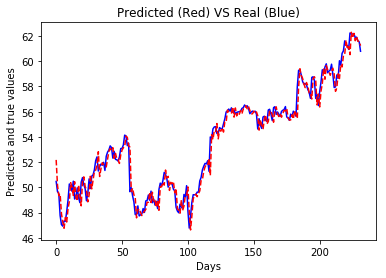

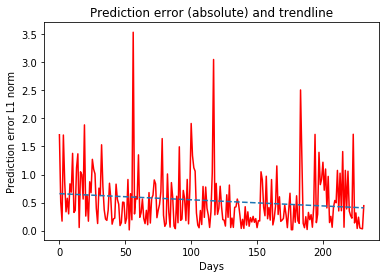

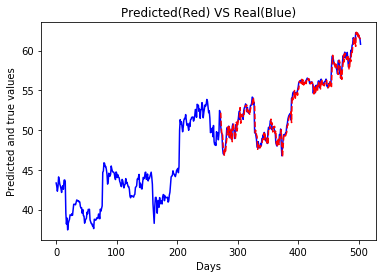

In [48]:
symbol         = "MSFT"
feat_dimension = 20
train_size     = 252
test_size      = 252 - feat_dimension
    
# 텐서 플로우 설정 
learning_rate = 0.5
optimizer     = tf.train.AdamOptimizer
n_epochs      = 20000

# 주가를 가져와 훈련데이터와 테스트 데이터를 분할
stock_values = fetch_stock_price(symbol, datetime.date(2015,1,1), datetime.date(2016,12,31))
minibatch_stock_X, minibatch_stock_y = format_dataset(stock_values, feat_dimension)

# 분석 속도를 높이기위해서 -> np.float32
train_X = minibatch_stock_X[:train_size, :].astype(np.float32)
train_y = minibatch_stock_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X  = minibatch_stock_X[train_size:, :].astype(np.float32)
test_y  = minibatch_stock_y[train_size:].reshape((-1, 1)).astype(np.float32)

X_tf = tf.placeholder("float", shape = (None, feat_dimension), name= "X")
y_tf = tf.placeholder("float", shape = (None, 1), name= "y")

weights = tf.Variable(tf.truncated_normal([feat_dimension, 1], mean = 0.0, stddev = 1.0), name="weights")
biases  = tf.Variable(tf.zeros([1,1]), name = "bias")

y_pred   = regression_ANN(X_tf, weights, biases)
cost     = tf.reduce_mean(tf.square(y_tf- y_pred))
train_op = optimizer(learning_rate).minimize(cost)

with tf.Session() as sess :
    # 변수 초기화 
    sess.run(tf.global_variables_initializer())
    # 한 세대마다 전체 훈련 데이터 셋이 텐서플로 그래프에 공급 
    
    for i in range(n_epochs):
        train_cost,_ = sess.run([cost, train_op], feed_dict={X_tf:train_X, y_tf:train_y})
        print("Training iteration", i, "MSE", train_cost)
    
    # 훈련시킨 다음 테스트 데이터 셋에 대해 성능을 확인
    test_cost, y_pr = sess.run([cost, y_pred], feed_dict={X_tf:test_X, y_tf:test_y})
    print("Test dataset: ", test_cost)
    
    # 결과 평가 
    evaluate_ts(test_X, test_y, y_pr)
    
    # 예측값이 어떻게 보이는지 확인 
    plt.plot(range(len(stock_values)), stock_values, 'b')
    plt.plot(range(len(stock_values)-test_size, len(stock_values)), y_pr, 'r--')
    plt.xlabel("Days")
    plt.ylabel("Predicted and true values")
    plt.title("Predicted(Red) VS Real(Blue)")
    plt.show()